In [2]:
import matplotlib.pyplot as plt
from collections import Counter
import re
import pandas as pd
from tinydb import TinyDB, Query
from config import *

In [3]:
db = TinyDB(DB_FILE)
processed_table = db.table(TABLE_PROCESSED)

In [4]:
data = processed_table.all() 
df = pd.DataFrame(data)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              523 non-null    object 
 1   min_salary         54 non-null     float64
 2   max_salary         43 non-null     float64
 3   salary_currency    66 non-null     object 
 4   minimum_education  523 non-null    object 
 5   languages          523 non-null    object 
 6   experience         345 non-null    float64
 7   responsibilities   523 non-null    object 
 8   hard_skills        523 non-null    object 
 9   soft_skills        523 non-null    object 
 10  certifications     523 non-null    object 
 11  benefits           523 non-null    object 
 12  city               306 non-null    object 
 13  country            324 non-null    object 
 14  company_name       523 non-null    object 
 15  company_size       257 non-null    object 
 16  employment_type    523 non

,title,min_salary,max_salary,salary_currency,minimum_education,languages,experience,responsibilities,hard_skills,soft_skills,...,company_size,employment_type,work_schedule,contract_type,remote_work,job_categories,date,source,occurrences,original_url
0,dotnet developer,NaN,NaN,None,none,[ro],2.0,[],[dotnet],[],...,None,full-time,None,None,on-site,[programming],30/05/2025,robota.md,"[30/05/2025, 31/05/2025]",https://www.rabota.md/ro/joburi/middle-net-dev...
1,golang developer,NaN,NaN,None,none,[en],3.0,"[traffic processing, ensure stability, design ...","[golang, http, https, multithreading, sql, gra...","[teamwork, problem solving]",...,None,full-time,flexible,permanent,hybrid,[programming],30/05/2025,robota.md,"[31/05/2025, 30/05/2025, 01/06/2025]",https://www.rabota.md/ro/locuri-de-munca/middl...
2,1c programmer,NaN,NaN,None,bachelor,"[ro, ru]",1.0,[],[1c],[],...,None,full-time,standard,permanent,on-site,[programming],30/05/2025,robota.md,"[31/05/2025, 30/05/2025, 01/06/2025]",https://www.rabota.md/ro/locuri-de-munca/progr...
3,ios developer,NaN,NaN,None,unspecified,"[ro, ru]",1.0,"[develop, maintain, optimize, collaborate, debug]","[swift, swiftui, cocoapods, git, oop, mvc, mvv...",[],...,None,full-time,standard,permanent,on-site,[programming],30/05/2025,robota.md,"[31/05/2025, 30/05/2025, 01/06/2025]",https://www.rabota.md/ro/locuri-de-munca/ios-d...
4,devops engineer,NaN,NaN,None,none,[en],3.0,"[analyze, design, develop, build, test, deploy...","[aws, amazon cloudwatch, azure, cicd, docker, ...",[],...,None,full-time,standard,permanent,on-site,[programming],30/05/2025,robota.md,"[31/05/2025, 30/05/2025, 01/06/2025]",https://www.rabota.md/ro/locuri-de-munca/devop...


In [47]:
import pandas as pd

keyword = 'rust'  # your search keyword

filtered_df = df[df['hard_skills'].apply(lambda skills: keyword.lower() in [s.lower() for s in skills] if isinstance(skills, list) else False)]


print(f"Number of entities found with hard_skill '{keyword}': {len(filtered_df)}\n")

from tabulate import tabulate

print(tabulate(filtered_df[['title', 'hard_skills']], headers='keys', tablefmt='grid'))



Number of entities found with hard_skill 'rust': 7

+-----+----------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|     | title                | hard_skills                                                                                                                                                                                                                  |
+=====+======================+==============================================================================================================================================================================================================================+
| 348 | blockchain developer | ['rust', 'cosmwasm', 'golang', 'typescript', 'blockchain', 'smart contracts', 'evm']                                                                       

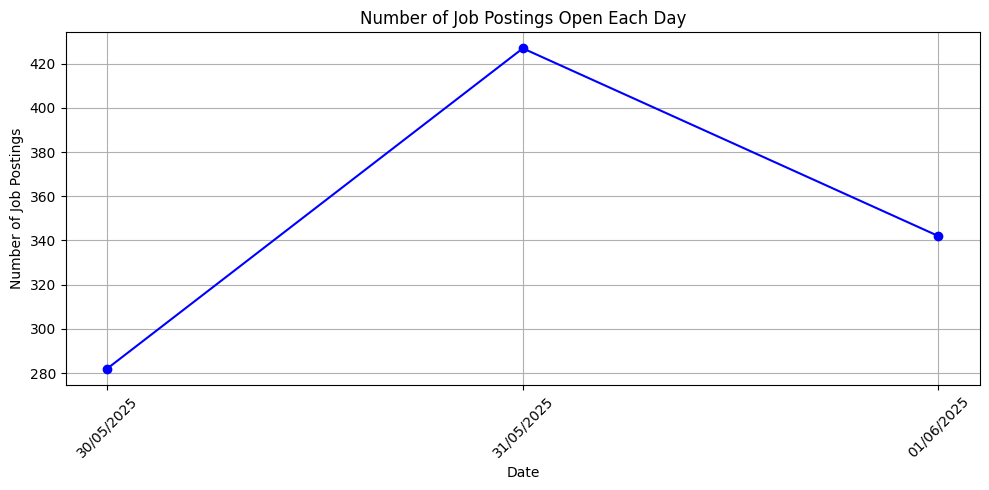

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from collections import Counter
from utils import parse_date

# Flatten occurrence dates
all_dates = []
for occ_list in df['occurrences'].dropna():
    if isinstance(occ_list, list):
        all_dates.extend(occ_list)
    elif isinstance(occ_list, str):
        all_dates.append(occ_list)

# Parse dates
date_objects = [parse_date(d) for d in all_dates]

# Count occurrences per date
date_counts = Counter(date_objects)

# Sort dates
sorted_dates = sorted(date_counts.items())
dates, counts = zip(*sorted_dates)

plt.figure(figsize=(10, 5))
plt.plot(dates, counts, marker='o', linestyle='-', color='b')

plt.title("Number of Job Postings Open Each Day")
plt.xlabel("Date")
plt.ylabel("Number of Job Postings")
plt.grid(True)

# Set major locator and formatter for dates
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator())  # Tick every day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))  # Format as DD/MM/YYYY

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



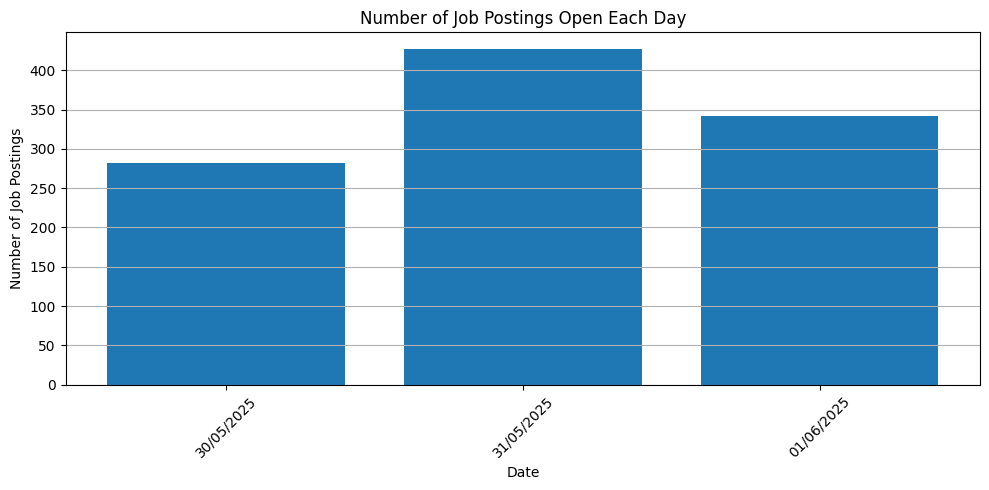

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from collections import Counter
from utils import parse_date

# Flatten occurrence dates
all_dates = []
for occ_list in df['occurrences'].dropna():
    if isinstance(occ_list, list):
        all_dates.extend(occ_list)
    elif isinstance(occ_list, str):
        all_dates.append(occ_list)

# Parse dates
date_objects = [parse_date(d) for d in all_dates]

# Count occurrences per date
date_counts = Counter(date_objects)

# Sort dates
sorted_dates = sorted(date_counts.items())
dates, counts = zip(*sorted_dates)

plt.figure(figsize=(10, 5))
plt.bar(dates, counts)

plt.title("Number of Job Postings Open Each Day")
plt.xlabel("Date")
plt.ylabel("Number of Job Postings")
plt.grid(axis='y')

# Format dates on x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator())  # one tick per day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))  # DD/MM/YYYY format

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


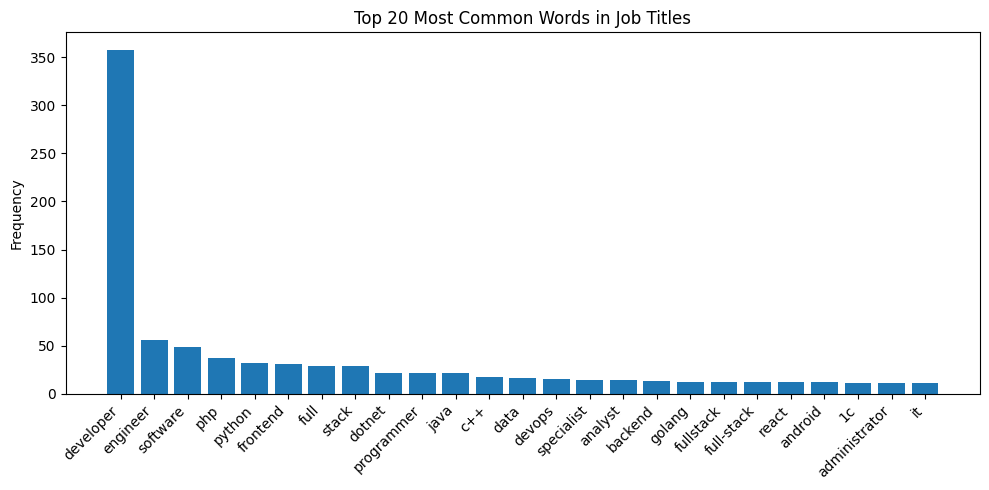

Full list of word frequencies:

developer            358
engineer             56
software             49
php                  37
python               32
frontend             31
full                 29
stack                29
dotnet               22
programmer           22
java                 22
c++                  17
data                 16
devops               15
specialist           14
analyst              14
backend              13
golang               12
fullstack            12
full-stack           12
react                12
android              12
1c                   11
administrator        11
it                   11
qa                   10
net                  10
web                  9
ios                  8
ai                   8
development          8
native               7
javascript           6
technical            6
support              6
business             6
front                5
end                  5
network              5
lead                 5
system              

In [8]:
# most common words in job titles

# Flatten all words into a single list
all_words = [word for title in df['title'].dropna() for word in title.split()]

# Count occurrences
word_counts = Counter(all_words)

# Plot top 20 most common words
top_words = dict(word_counts.most_common(25))
plt.figure(figsize=(10, 5))
plt.bar(top_words.keys(), top_words.values())
plt.title('Top 20 Most Common Words in Job Titles')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# Print full list sorted by frequency
print("Full list of word frequencies:\n")
for word, count in word_counts.most_common():
    print(f"{word:20} {count}")

In [9]:
# Raw, non processed titles
# Get the value counts of the 'title' column
title_counts = df['title'].value_counts()

# Set pandas display options to show all rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)

# Display all job title occurrences
print("All Job Title Occurrences:")
print(title_counts)

All Job Title Occurrences:
title
software developer                   34
php developer                        32
python developer                     28
frontend developer                   28
full stack developer                 27
java developer                       22
c++ developer                        17
dotnet developer                     15
android developer                    12
full-stack developer                 12
devops engineer                      12
backend developer                    11
1c programmer                        11
golang developer                     10
software engineer                     9
web developer                         8
ios developer                         8
react native developer                7
net developer                         7
fullstack developer                   6
data engineer                         6
javascript developer                  5
front end developer                   5
data analyst                          4
react d

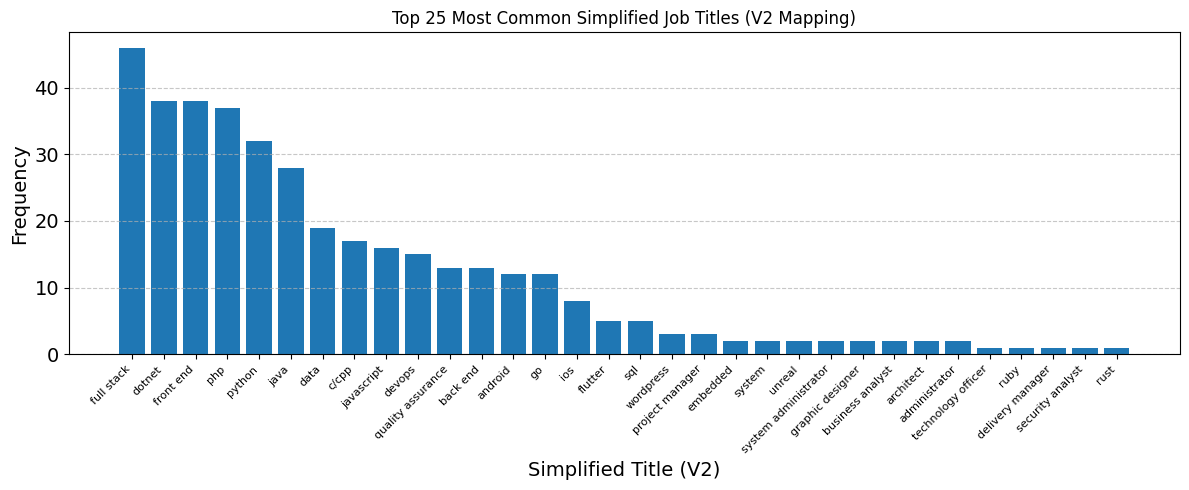


All Simplified Job Title Occurrences (Programming Languages Top, iOS/Android Higher, Full Stack Lower):
simplified_title_reordered_v2
full stack              46
dotnet                  38
front end               38
php                     37
python                  32
java                    28
data                    19
c/cpp                   17
javascript              16
devops                  15
quality assurance       13
back end                13
android                 12
go                      12
ios                      8
flutter                  5
sql                      5
wordpress                3
project manager          3
embedded                 2
system                   2
unreal                   2
system administrator     2
graphic designer         2
business analyst         2
architect                2
administrator            2
technology officer       1
ruby                     1
delivery manager         1
security analyst         1
rust                     1
N

In [10]:
# Cherry Pick with regex best words

# 1. Define dictionary with keyword / simplified titles you experienceect (priority matters implicitly by order)
JOB_KEYWORD_MAPPING_REORDERED_V2 = {
    # Programming Languages (Prioritized and ordered by perceived commonality/specificity)
    'python': r'python',
    'kotlin': r'kotlin',
    'java': r'java|full stack java|spring',
    'dotnet': r'\.net|dot[-\s]?net|net|asp\.net|aspdotdotnet|dotnetwork|dotdotnet|csharp/dotdotnet|aspdotdotnet dotdotnet|dotdotnet core|dotdotnet developers|c#|c[-\s]?sharp|csharp|asp\.net|dotdotnet',
    'javascript': r'node\.?js|nodejavascript|reactjs|react|react native|angularjs|angular|vue.javascript|vue.js', # Combining related JS frameworks
    'php': r'php symfony|php',
    'go': r'golang|go',
    'rust': r'rust',
    'swift': r'swift',
    'haskel': r'haskel|lisp',
    'ruby': r'ruby|rails', # Assuming Rails is specific to Ruby
    'c/cpp': r'c\+\+|c/cpp',
    'sql': r'sql|oracle|microsoft dynamics', # Databases related to programming

    # Mobile Development
    'ios': r'ios',
    'android': r'android',
    'flutter': r'flutter/dart|flutter',

    # Front-End and Back-End (Full Stack below)
    'front end': r'front[-\s]?end',
    'back end': r'back[-\s]?end|dotdotnet back end|back end nodejavascript',
    'full stack': r'full[-\s]?stack|full stack web|full stack web development|full stack development|arhitect full stack|dezvoltator full stack|full stack php|full stack dotdotnet',

    # Quality Assurance
    'quality assurance': r'qa|quality assurance|quality assurance analyst|automation quality assurance|quality assurance tester|tester',

    # Data Related
    'data': r'data analyst|data|data analyst data scientist|etl data tester|data steward',

    # DevOps and System Administration
    'devops': r'devops|azure devops|system devops',
    'system administrator': r'system administrator|linux dotnetwork administrator|system administrator helpdesk|web administrator',
    'linux administrator': r'linux',
    'monitoring operator': r'monitoring operator',
    'infrastructure support': r'infrastructure support',
    'system': r'system|linux dotnetwork system administrator',

    # Management/Leadership
    'project manager': r'project manager|software project manager',
    'product manager': r'product manager',
    'technology officer': r'technology officer',
    'delivery manager': r'delivery manager',
    'team lead': r'team lead', # Assuming this was a desired category (not in original, but often relevant)
    'architect': r'architect',

    # Analysis and Design
    'business analyst': r'business analyst|business analyst project coordinator',
    'ui ux designer': r'ui[/]?ux',
    'erp analyst': r'erp analyst',
    'market research analyst': r'market research analyst',
    'graphic designer': r'grafic designer|graphic designer|designer',
    'artist': r'artist',

    # Other Technical Roles
    'embedded': r'embedded|mcu',
    'unreal': r'unreal engine|unreal game |unrealdeveloper',
    'security analyst': r'security analyst',
    'cybersecurity': r'cybersecurity',
    'site reliability': r'site reliability',
    'mobile application': r'mobile application', # Keeping it here as it's a type of application
    'web': r'веб|веб-программист|web designer', # Broader web category
    'r&d': r'r&d',
    'wordpress': r'wordpress', # Could be web development, but often distinct
    'administrator': r'administrator', # Very general
        
    'UNKNOWN': 'other', # Default category if no keyword is found
}

def categorize_title_reordered_v2(title):
    """
    Passes through the job title and categorizes it based on the reordered
    predefined keywords with programming languages on top, full stack below
    front/back end, and iOS/Android higher.
    """
    if isinstance(title, str):
        processed_title = title.lower().strip()
        processed_title = re.sub(r'\([^)]*\)', '', processed_title).strip() # Remove parentheses content

        for category, pattern in JOB_KEYWORD_MAPPING_REORDERED_V2.items():
            if re.search(pattern, processed_title):
                return category
        return 'other'
    return 'other'

# Recalculate categorization
df['simplified_title_reordered_v2'] = df['title'].apply(categorize_title_reordered_v2)


# Get the value counts of the prioritized simplified titles (version 2)
simplified_title_counts_reordered_v2 = df['simplified_title_reordered_v2'].value_counts()

# remove other keyword
del simplified_title_counts_reordered_v2["other"]

plt.figure(figsize=(12, 5))
plt.bar(simplified_title_counts_reordered_v2.index, simplified_title_counts_reordered_v2.values)
plt.title('Top 25 Most Common Simplified Job Titles (V2 Mapping)')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Simplified Title (V2)', fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

# Display all prioritized simplified job title occurrences (version 2)
print("\nAll Simplified Job Title Occurrences (Programming Languages Top, iOS/Android Higher, Full Stack Lower):")
print(simplified_title_counts_reordered_v2)


In [11]:
import pandas as pd
from collections import defaultdict, Counter

def get_ngrams(text, n):
    """
    Generates a set of n-grams from the given text.

    Args:
        text (str): The input text.
        n (int): The length of the n-grams.

    Returns:
        set: A set of n-grams.  Returns an empty set if text is shorter than n.
    """
    if len(text) < n:
        return set()
    return set(text[i:i+n] for i in range(len(text) - n + 1))

def ngram_similarity(term1, term2, n=3):
    """
    Calculates the n-gram similarity between two terms.

    Args:
        term1 (str): The first term.
        term2 (str): The second term.
        n (int, optional): The length of the n-grams. Defaults to 3.

    Returns:
        float: The n-gram similarity (between 0 and 1). Returns 0 if both terms are empty.
    """
    ngrams1 = get_ngrams(term1, n)
    ngrams2 = get_ngrams(term2, n)
    intersection = ngrams1.intersection(ngrams2)
    union = ngrams1.union(ngrams2)
    return len(intersection) / len(union) if union else 0.0  # Handle empty case

def cluster_terms_by_ngram_similarity(df, column_name, similarity_threshold=0.15, n=3, b_print=False):
    """
    Clusters terms in a DataFrame column based on n-gram similarity, and prints the clusters.

    Args:
        df (pd.DataFrame): The DataFrame containing the terms.
        column_name (str): The name of the column containing the terms (lists of strings).
        similarity_threshold (float, optional): The similarity threshold for clustering. Defaults to 0.15.
        n (int, optional): The length of the n-grams to use for comparison. Defaults to 3.
    """
    # 1. Extract and flatten the list of terms, handling NaNs robustly
    all_things = [tech for tech_list in df[column_name].dropna() for tech in (tech_list if isinstance(tech_list, list) else [tech_list])]

    # 2. Count occurrences of each term
    counts = Counter(all_things)

    # 3. Initialize data structures for clustering
    clusters = defaultdict(list)
    terms = list(counts.keys())
    assigned = set()

    # 4. Perform the clustering
    for i, term1 in enumerate(terms):
        if i not in assigned:
            clusters[term1].append(term1)
            assigned.add(i)
            for j in range(i + 1, len(terms)):
                if j not in assigned:
                    similarity = ngram_similarity(term1, terms[j], n=n)
                    if similarity >= similarity_threshold:
                        clusters[term1].append(terms[j])
                        assigned.add(j)

    if b_print == True:
        # 5. Print the results
        print(f"Potential Clusters (N-gram, Threshold={similarity_threshold}, N={n}):")
        if not clusters:
            print("No clusters found.")  # Handle the case where no clusters are formed.
            return
    
        for key, value in clusters.items():
            if len(value) > 1:
                print(f"  {key}: {', '.join(value)}")
            
    return clusters #returning the clusters, in case the user wants to use them

In [12]:
def analyze_and_visualize_consolidated_terms(df, column_name, similarity_threshold=0.15, n=2, top_n=20, 
                                     figsize=(10, 5), rotation=45, show_details=True):
    """
    Analyzes, consolidates, and visualizes terms from a specified DataFrame column,
    grouping similar terms based on n-gram similarity.
    
    Args:
        df (pd.DataFrame): The DataFrame containing the terms.
        column_name (str): The name of the column containing the terms (lists of strings).
        similarity_threshold (float, optional): The similarity threshold for clustering. Defaults to 0.15.
        n (int, optional): The length of the n-grams to use for comparison. Defaults to 2.
        top_n (int, optional): Number of top terms to visualize. Defaults to 20.
        figsize (tuple, optional): Figure size for the plot. Defaults to (10, 5).
        rotation (int, optional): Rotation angle for x-axis labels. Defaults to 45.
        show_details (bool, optional): Whether to print consolidation details. Defaults to True.
        
    Returns:
        tuple: (consolidated_counts, clusters) - Counter object with consolidated counts and clusters dictionary
    """
    import matplotlib.pyplot as plt
    from collections import Counter
    
    # Extract and flatten all terms from the specified column
    all_terms = [term for term_list in df[column_name].dropna() for term in 
                (term_list if isinstance(term_list, list) else [term_list])]
    
    # Count occurrences
    original_counts = Counter(all_terms)
    
    # Generate clusters
    clusters = cluster_terms_by_ngram_similarity(df, column_name, 
                                               similarity_threshold=similarity_threshold, n=n)
    
    # Create a mapping from each term to its cluster representative (the cluster key)
    term_to_cluster = {}
    for cluster_key, terms in clusters.items():
        for term in terms:
            term_to_cluster[term] = cluster_key
    
    # Consolidate counts based on clusters
    consolidated_counts = Counter()
    for term, count in original_counts.items():
        # If the term is in a cluster, add its count to the cluster key
        if term in term_to_cluster:
            consolidated_counts[term_to_cluster[term]] += count
        else:
            # If not in any cluster, keep it as is
            consolidated_counts[term] += count
    
    # Plot top N most common consolidated terms
    top_terms = dict(consolidated_counts.most_common(top_n))
    plt.figure(figsize=figsize)
    plt.bar(top_terms.keys(), top_terms.values())
    plt.title(f'Top {top_n} Most Common {column_name.capitalize()}')
    plt.xticks(rotation=rotation, ha='right')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    
    # Print full list sorted by frequency
    print(f"Full list of consolidated {column_name} term frequencies:\n")
    for term, count in consolidated_counts.most_common():
        print(f"{term:20} {count}")
    
    # Optionally, print which terms were consolidated
    if show_details:
        print("\nConsolidation details:")
        for cluster_key, terms in clusters.items():
            if len(terms) > 1:
                total_count = sum(original_counts[term] for term in terms)
                print(f"{cluster_key} ({total_count}): {', '.join(terms)}")
    
    return consolidated_counts, clusters

In [13]:
GENERIC_JOB_KEYWORD_MAPPING = {
    # Programming Roles
    'backend': r'\b(back[-\s]?end|node\.?js|golang|php|ruby|rails|python|java|dotnet|net|\.net|asp\.net|c#|c[-\s]?sharp|c\+\+|c/cpp)\b',
    'frontend': r'\b(front[-\s]?end|react(\.js)?|angular(\.js)?|vue(\.js)?|javascript|html|css)\b',
    'full stack': r'\bfull[-\s]?stack\b',
    
    # Mobile Development
    'mobile developer': r'\b(android|ios|flutter|react native|mobile application|kotlin)\b',

    # Data/Analytics
    'data': r'\b(data|data analyst|etl|data scientist|data steward|sql|oracle)\b',

    # Quality Assurance / Testing
    # 'qa tester': r'\b(qa|quality assurance|tester|automation)\b',

    # DevOps and Infrastructure
    'devops': r'\b(devops|azure devops|site reliability|infrastructure support)\b',
    # 'sysadmin': r'\b(system administrator|linux|web administrator|monitoring operator|administrator)\b',

    # UI/UX & Design
    # 'ui/ux designer': r'\b(ui[/]?[ ]?ux|designer|graphic designer|grafic designer)\b',

    # Management & Lead Roles
    # 'manager': r'\b(project manager|product manager|delivery manager|team lead|technology officer|architect)\b',

    # Analyst & Business Roles
    # 'analyst': r'\b(business analyst|market research analyst|erp analyst)\b',

    # Security
    # 'security': r'\b(security analyst|cybersecurity)\b',

    # Game
    'gamedev': r'\b(unity|unreal engine|unreal|godot)\b',

    # Web Development (broad)
    # 'web': r'\b(web|wordpress|веб|веб-программист)\b',

    # Research & Development
    # 'r&d': r'\br&d\b',

    # Fallback
    # 'other': r'.*',
}


In [14]:
import re

def extract_generic_title(title, mapping):
    for generic_title, pattern in mapping.items():
        if re.search(pattern, title, flags=re.IGNORECASE):
            return generic_title
    return None

df['generic_title'] = df['title'].apply(lambda x: extract_generic_title(x, GENERIC_JOB_KEYWORD_MAPPING))

In [15]:
import pandas as pd
from collections import Counter

filtered_df = df[df['generic_title'].notna()]

# Store counts per job title
tech_data = {}
soft_data = {}

for job in filtered_df['generic_title'].unique():
    subset = filtered_df[filtered_df['generic_title'] == job]
    
    # Tech skills counts
    tech_skills = [skill for skills_list in subset['hard_skills'].dropna() for skill in skills_list]
    tech_counts = Counter(tech_skills)
    tech_data[job] = tech_counts
    
    # Soft skills counts
    soft_skills = [skill for skills_list in subset['soft_skills'].dropna() for skill in skills_list]
    soft_counts = Counter(soft_skills)
    soft_data[job] = soft_counts

def build_ranked_df(skill_data, top_n=10):
    jobs = list(skill_data.keys())
    ranked_dict = {job: [] for job in jobs}
    
    # Build lists of top skills with counts as strings per job
    for job in jobs:
        top_skills = skill_data[job].most_common(top_n)
        ranked_dict[job] = [f"{skill} ({count})" for skill, count in top_skills]
        
        # Pad with empty strings if less than top_n skills
        if len(ranked_dict[job]) < top_n:
            ranked_dict[job].extend([''] * (top_n - len(ranked_dict[job])))
    
    # Create DataFrame with ranks as index
    ranked_df = pd.DataFrame(ranked_dict, index=[f"Rank {i+1}" for i in range(top_n)])
    return ranked_df

# Create ranked DataFrames
tech_ranked_df = build_ranked_df(tech_data, top_n=25)
soft_ranked_df = build_ranked_df(soft_data, top_n=25)

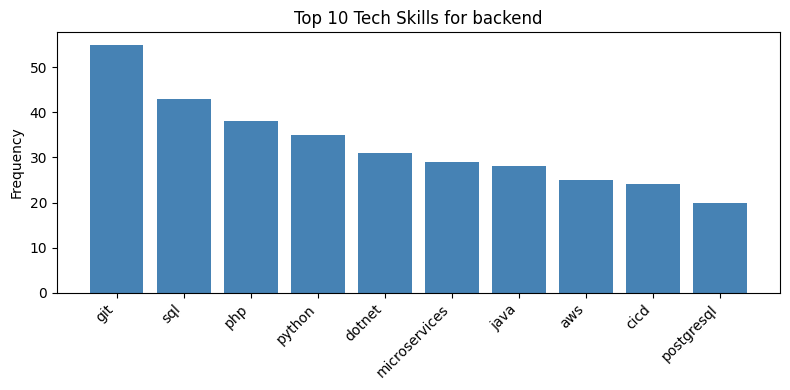

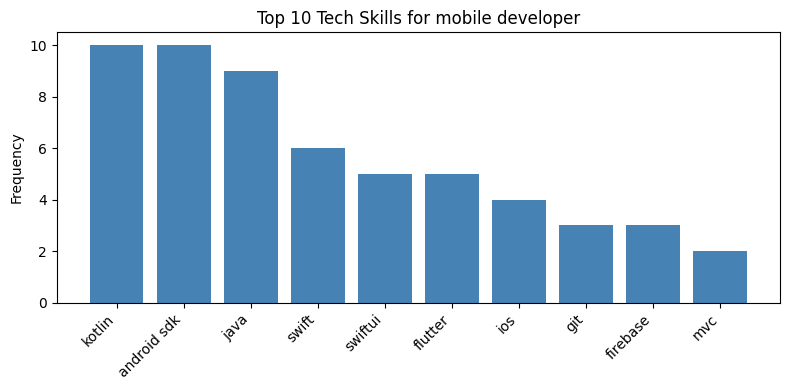

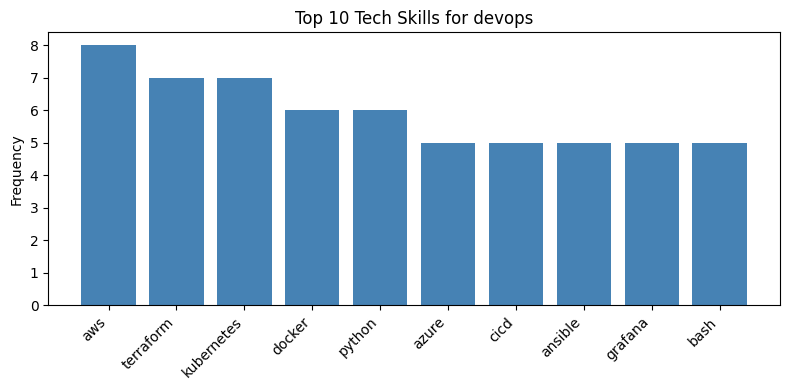

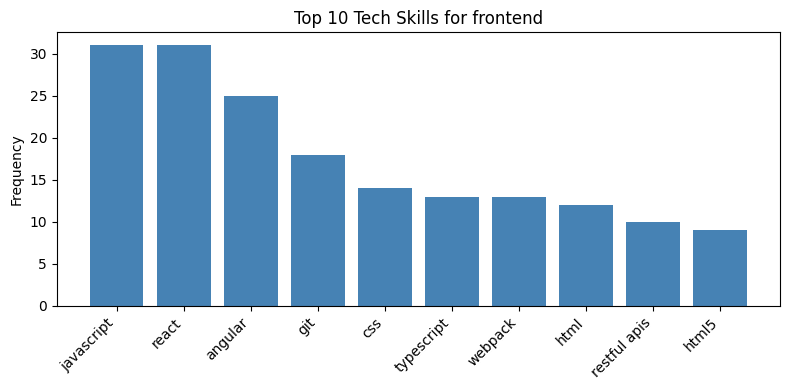

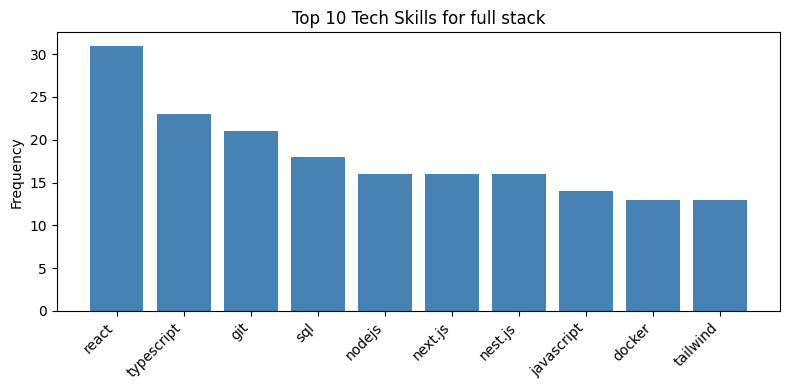

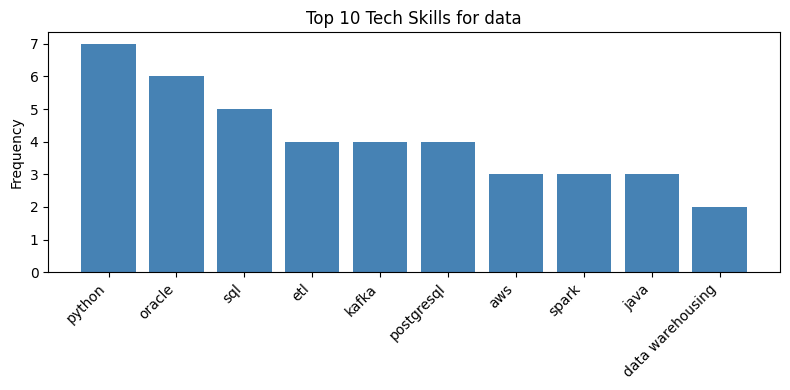

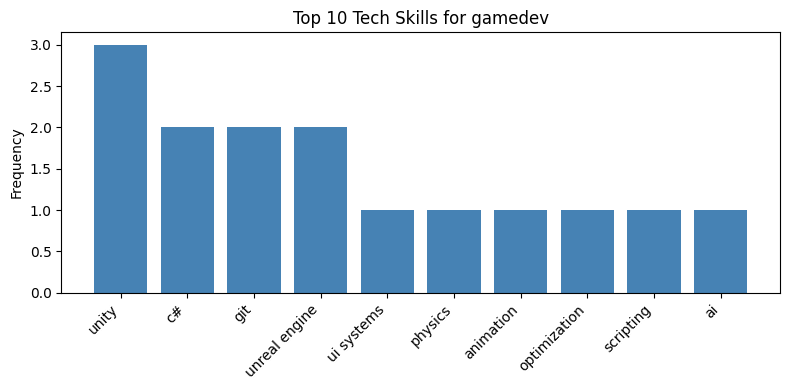

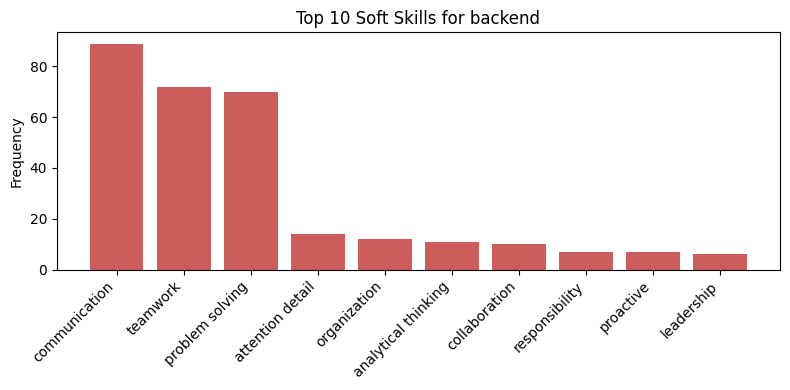

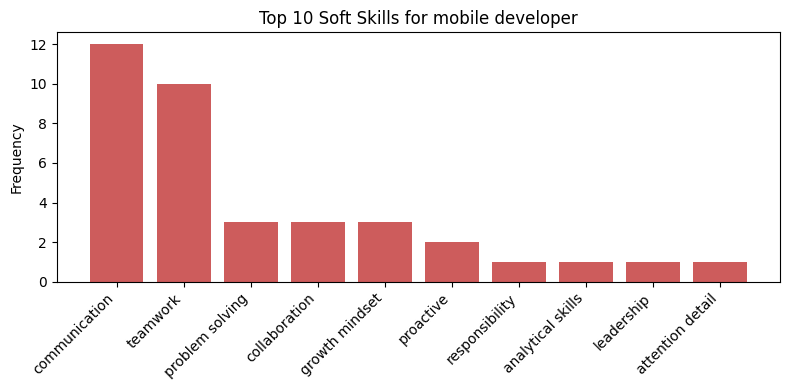

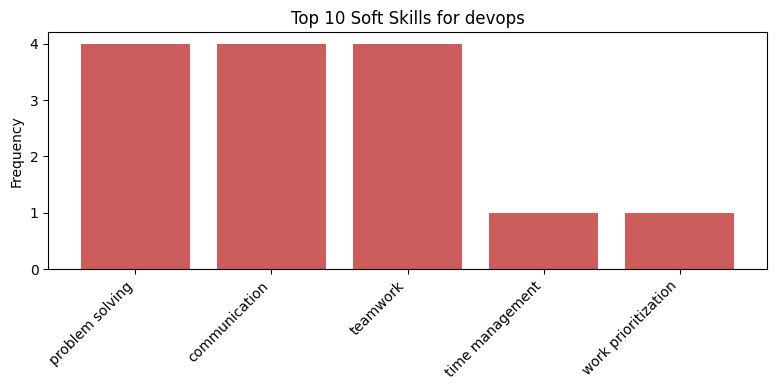

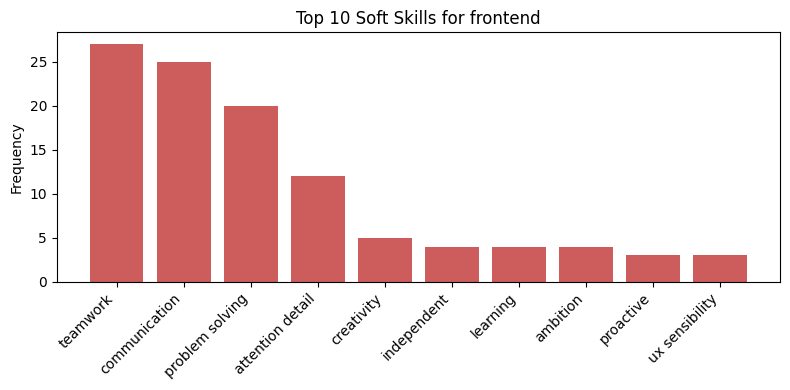

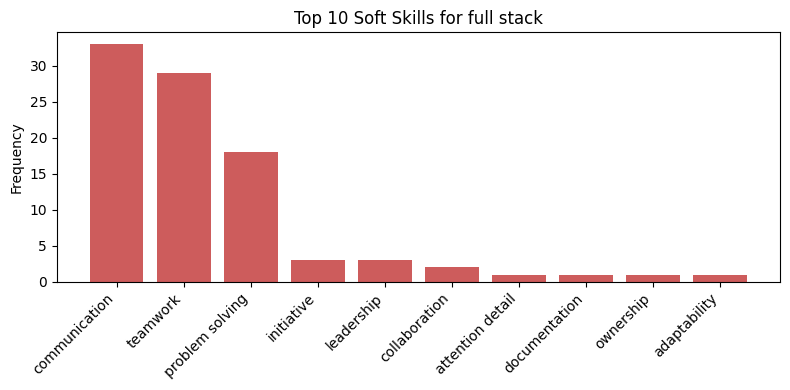

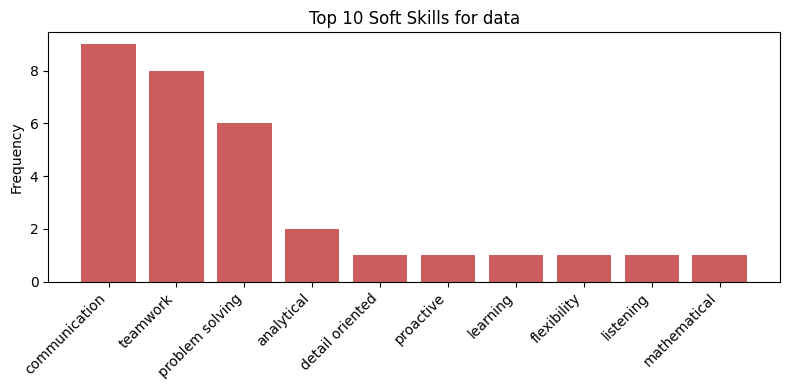

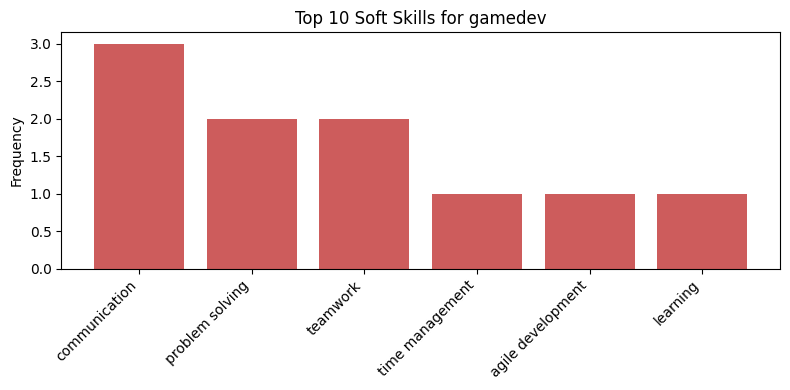

In [16]:
# Create DataFrame for tech skills counts
# Plot tech skills (top 10 per job)
for job in filtered_df['generic_title'].unique():
    tech_counts = tech_data[job].most_common(10)
    if tech_counts:
        skills, counts = zip(*tech_counts)
        plt.figure(figsize=(8, 4))
        plt.bar(skills, counts, color='steelblue')
        plt.title(f'Top 10 Tech Skills for {job}')
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

# Plot soft skills (top 10 per job)
for job in filtered_df['generic_title'].unique():
    soft_counts = soft_data[job].most_common(10)
    if soft_counts:
        skills, counts = zip(*soft_counts)
        plt.figure(figsize=(8, 4))
        plt.bar(skills, counts, color='indianred')
        plt.title(f'Top 10 Soft Skills for {job}')
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()


In [17]:
# Display
# print("\n=== Top 25 Tech Skills per Job ===")
display(tech_ranked_df)

,backend,mobile developer,devops,frontend,full stack,data,gamedev
Rank 1,git (55),kotlin (10),aws (8),javascript (31),react (31),python (7),unity (3)
Rank 2,sql (43),android sdk (10),terraform (7),react (31),typescript (23),oracle (6),c# (2)
Rank 3,php (38),java (9),kubernetes (7),angular (25),git (21),sql (5),git (2)
Rank 4,python (35),swift (6),docker (6),git (18),sql (18),etl (4),unreal engine (2)
Rank 5,dotnet (31),swiftui (5),python (6),css (14),nodejs (16),kafka (4),ui systems (1)
Rank 6,microservices (29),flutter (5),azure (5),typescript (13),next.js (16),postgresql (4),physics (1)
Rank 7,java (28),ios (4),cicd (5),webpack (13),nest.js (16),aws (3),animation (1)
Rank 8,aws (25),git (3),ansible (5),html (12),javascript (14),spark (3),optimization (1)
Rank 9,cicd (24),firebase (3),grafana (5),restful apis (10),docker (13),java (3),scripting (1)
Rank 10,postgresql (20),mvc (2),bash (5),html5 (9),tailwind (13),data warehousing (2),ai (1)


In [18]:
# print("\n=== Top 25 Soft Skills per Job ===")
display(soft_ranked_df)

,backend,mobile developer,devops,frontend,full stack,data,gamedev
Rank 1,communication (89),communication (12),problem solving (4),teamwork (27),communication (33),communication (9),communication (3)
Rank 2,teamwork (72),teamwork (10),communication (4),communication (25),teamwork (29),teamwork (8),problem solving (2)
Rank 3,problem solving (70),problem solving (3),teamwork (4),problem solving (20),problem solving (18),problem solving (6),teamwork (2)
Rank 4,attention detail (14),collaboration (3),time management (1),attention detail (12),initiative (3),analytical (2),time management (1)
Rank 5,organization (12),growth mindset (3),work prioritization (1),creativity (5),leadership (3),detail oriented (1),agile development (1)
Rank 6,analytical thinking (11),proactive (2),,independent (4),collaboration (2),proactive (1),learning (1)
Rank 7,collaboration (10),responsibility (1),,learning (4),attention detail (1),learning (1),
Rank 8,responsibility (7),analytical skills (1),,ambition (4),documentation (1),flexibility (1),
Rank 9,proactive (7),leadership (1),,proactive (3),ownership (1),listening (1),
Rank 10,leadership (6),attention detail (1),,ux sensibility (3),adaptability (1),mathematical (1),


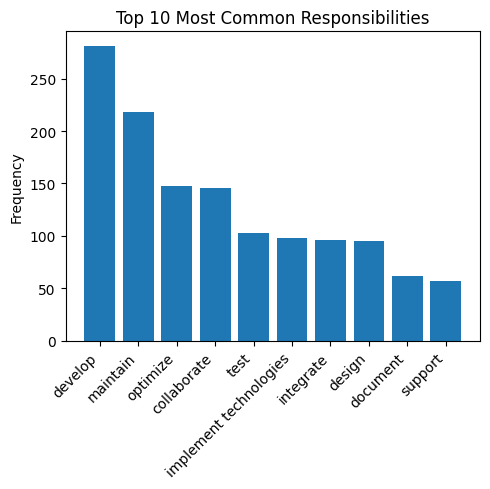

Full list of consolidated responsibilities term frequencies:

develop              281
maintain             218
optimize             148
collaborate          146
test                 103
implement technologies 98
integrate            96
design               95
document             62
support              57
improve              41
analyze              39
review               37
debug                35
troubleshoot         33
manage               31
build                29
monitor              27
generate             27
define               26
mentor               25
deploy               24
correct responses    24
resolve              21
lead                 20
participate          20
configure            16
deliver              15
contribute           14
write                14
communicate          13
fix                  13
ensure               12
create test cases    12
automate             10
plan                 9
code                 8
evaluate             8
research             8

In [19]:
tech_counts, tech_clusters = analyze_and_visualize_consolidated_terms(df, 'responsibilities', similarity_threshold=0.34, n=2, top_n=10, 
                                     figsize=(5, 5), rotation=45, show_details=True)

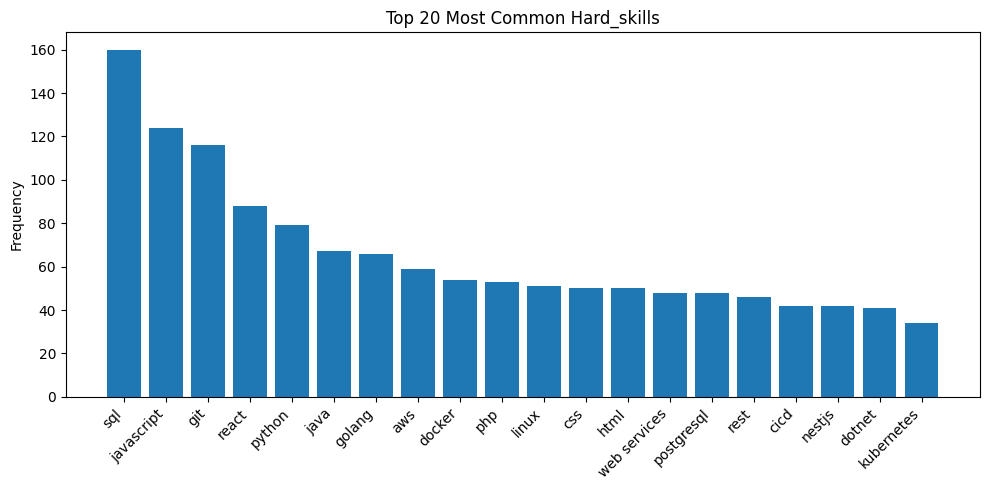

Full list of consolidated hard_skills term frequencies:

sql                  160
javascript           124
git                  116
react                88
python               79
java                 67
golang               66
aws                  59
docker               54
php                  53
linux                51
css                  50
html                 50
web services         48
postgresql           48
rest                 46
cicd                 42
nestjs               42
dotnet               41
kubernetes           34
c++                  31
restful api          31
nodejs               30
ai                   29
android              29
azure                27
tailwind css         27
vue                  26
nagios               25
spring boot          25
mongodb              24
next.js              24
nginx                23
google cloud         23
kafka                22
terraform            20
laravel              19
c#                   19
apache               19
cypr

In [20]:
tech_counts, tech_clusters = analyze_and_visualize_consolidated_terms(df, 'hard_skills', similarity_threshold=0.34, n=2, top_n=20, 
                                     figsize=(10, 5), rotation=45, show_details=True)

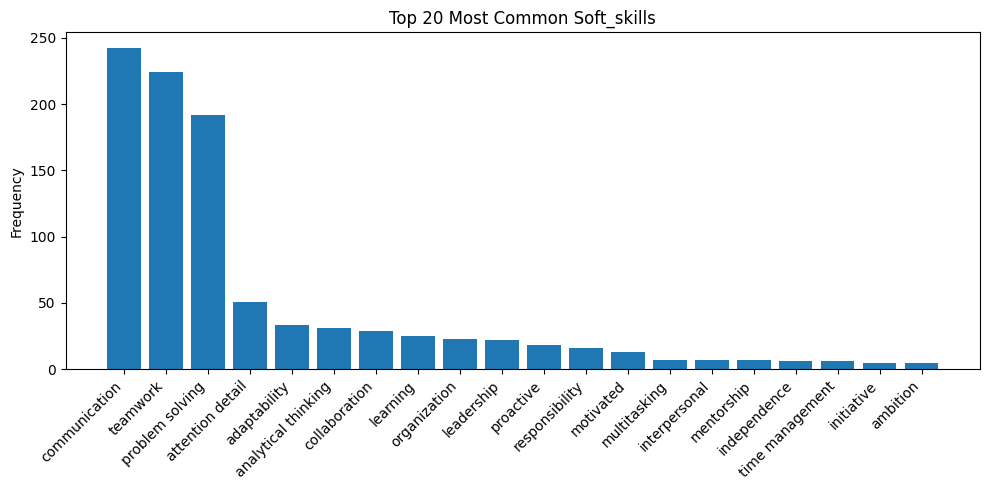

Full list of consolidated soft_skills term frequencies:

communication        242
teamwork             224
problem solving      192
attention detail     51
adaptability         33
analytical thinking  31
collaboration        29
learning             25
organization         23
leadership           22
proactive            18
responsibility       16
motivated            13
multitasking         7
interpersonal        7
mentorship           7
independence         6
time management      6
initiative           5
ambition             5
creativity           5
detail oriented      4
flexibility          4
documentation        3
growth mindset       3
customer oriented    3
professionalism      2
results-oriented     2
eager to grow        2
innovation           2
precision            1
work prioritization  1
passion              1
agile development    1
listening            1
fast learner         1
mathematical         1
negotiation          1
autonomous           1
energetic            1
fluent 

In [21]:
soft_counts, soft_clusters = analyze_and_visualize_consolidated_terms(df, 'soft_skills', similarity_threshold=0.4, n=2, top_n=20, 
                                     figsize=(10, 5), rotation=45, show_details=True)

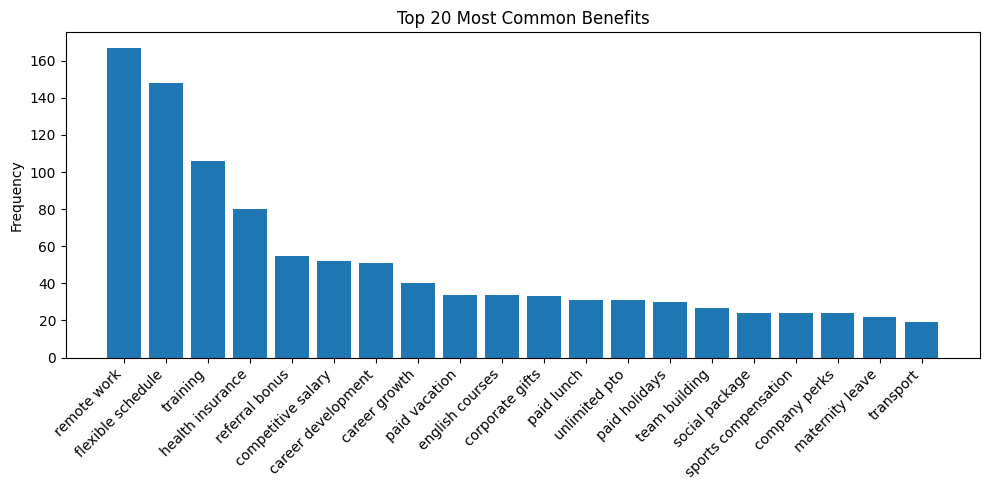

Full list of consolidated benefits term frequencies:

remote work          167
flexible schedule    148
training             106
health insurance     80
referral bonus       55
competitive salary   52
career development   51
career growth        40
paid vacation        34
english courses      34
corporate gifts      33
paid lunch           31
unlimited pto        31
paid holidays        30
team building        27
social package       24
sports compensation  24
company perks        24
maternity leave      22
transport            19
growth opportunities 18
performance bonus    18
hybrid work          17
psychological support 16
medical coverage     15
sick leave           14
comprehensive benefits 14
fitness discounts    14
meal tickets         13
childcare budget     12
travel               12
work-life balance    10
portfolio enhancement 10
education bonuses    9
equipment            9
snacks               9
modern office        9
gym                  7
recreation           7
hardware 

In [22]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'benefits', similarity_threshold=0.3, n=2, top_n=20, 
                                     figsize=(10, 5), rotation=45, show_details=True)

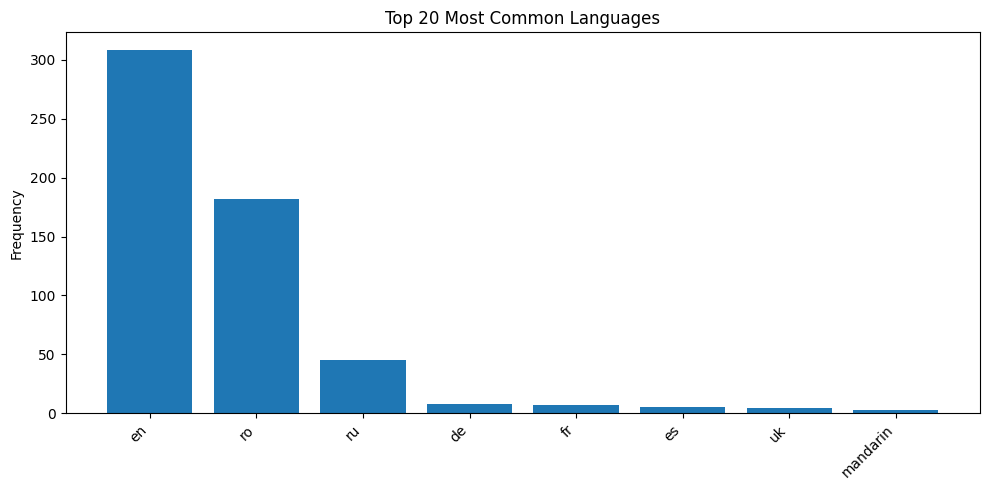

Full list of consolidated languages term frequencies:

en                   308
ro                   182
ru                   45
de                   8
fr                   7
es                   5
uk                   4
mandarin             3

Consolidation details:


In [23]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'languages', similarity_threshold=0.3, n=2, top_n=20, 
                                     figsize=(10, 5), rotation=45, show_details=True)

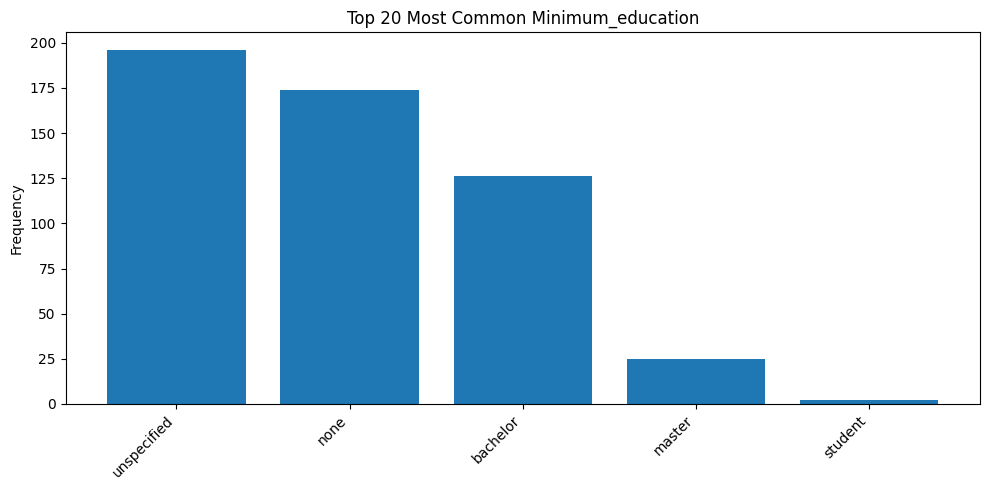

Full list of consolidated minimum_education term frequencies:

unspecified          196
none                 174
bachelor             126
master               25
student              2

Consolidation details:


In [24]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'minimum_education', similarity_threshold=0.3, n=2, top_n=20, 
                                     figsize=(10, 5), rotation=45, show_details=True)

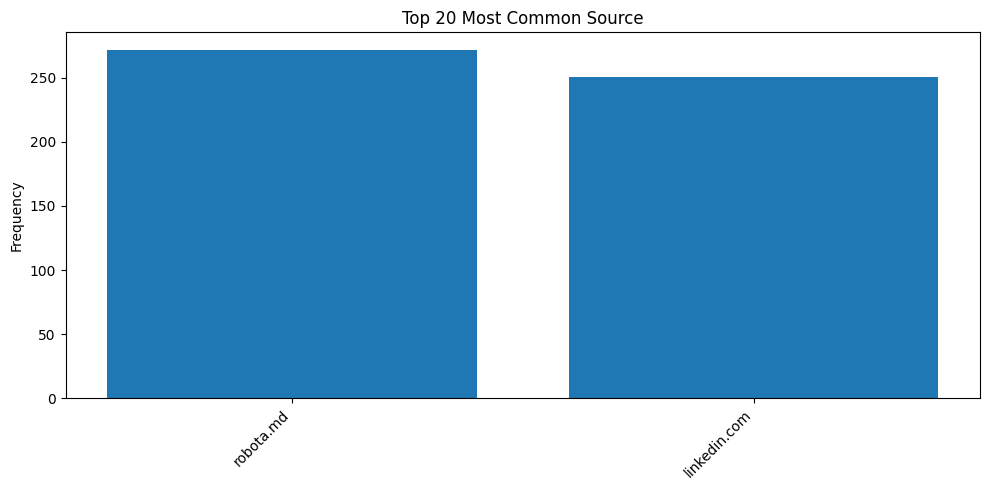

Full list of consolidated source term frequencies:

robota.md            272
linkedin.com         251

Consolidation details:


In [25]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'source', similarity_threshold=0.5, n=2, top_n=20, 
                                     figsize=(10, 5), rotation=45, show_details=True)

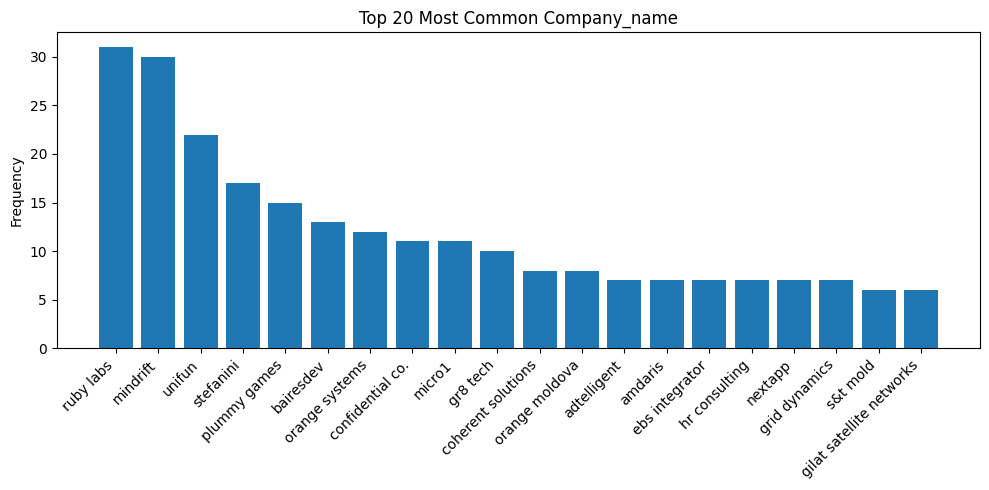

Full list of consolidated company_name term frequencies:

ruby labs            31
mindrift             30
unifun               22
stefanini            17
plummy games         15
bairesdev            13
orange systems       12
confidential co.     11
micro1               11
gr8 tech             10
coherent solutions   8
orange moldova       8
adtelligent          7
amdaris              7
ebs integrator       7
hr consulting        7
nextapp              7
grid dynamics        7
s&t mold             6
gilat satellite networks 6
loleworks            6
xairo                6
midnight works       5
meta-sistem s.r.l.   5
backstageit          5
zazitex              5
moldindconbank       5
maib                 5
mixbook              5
braintrust           5
endava               5
canonical            5
proxify              5
proovia it           4
tara interactive     4
kivork               4
avantaj prim         4
dkhardware           4
netbeau              4
microinvest          4
allied t

In [26]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'company_name', similarity_threshold=0.5, n=2, top_n=20, 
                                     figsize=(10, 5), rotation=45, show_details=True)

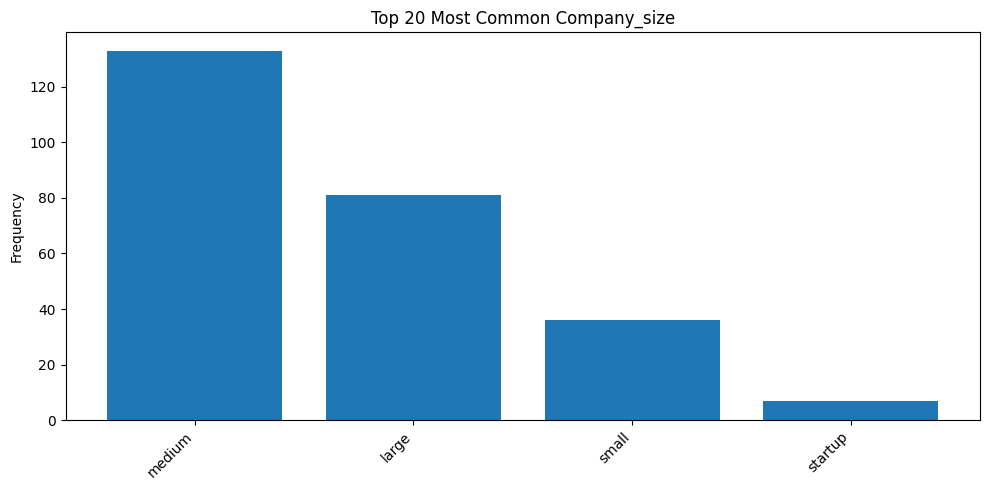

Full list of consolidated company_size term frequencies:

medium               133
large                81
small                36
startup              7

Consolidation details:


In [27]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'company_size', similarity_threshold=0.4, n=2, top_n=20, 
                                     figsize=(10, 5), rotation=45, show_details=True)

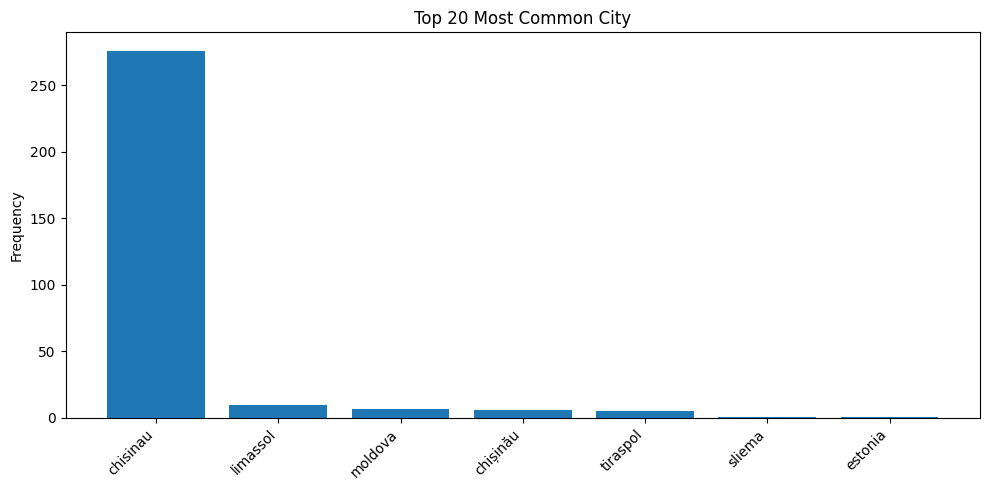

Full list of consolidated city term frequencies:

chisinau             276
limassol             10
moldova              7
chișinău             6
tiraspol             5
sliema               1
estonia              1

Consolidation details:


In [28]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'city', similarity_threshold=0.4, n=2, top_n=20, 
                                     figsize=(10, 5), rotation=45, show_details=True)

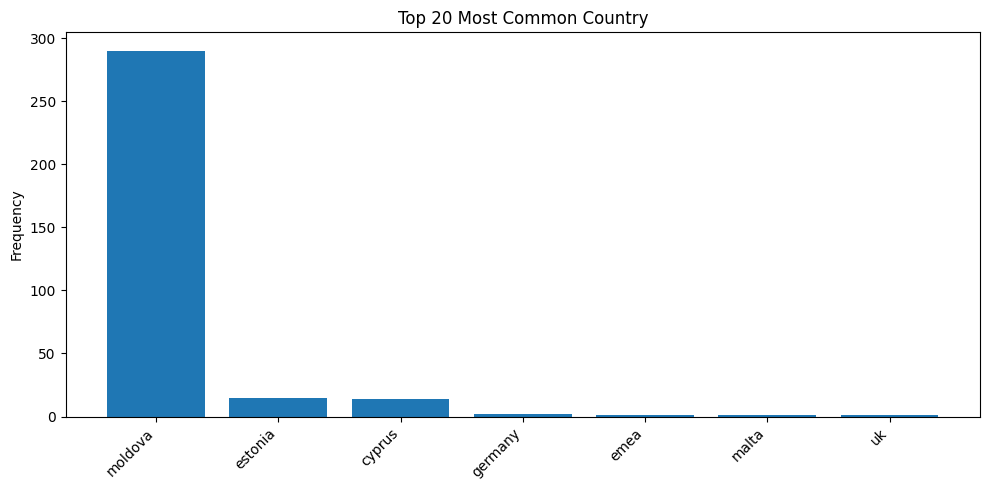

Full list of consolidated country term frequencies:

moldova              290
estonia              15
cyprus               14
germany              2
emea                 1
malta                1
uk                   1

Consolidation details:


In [29]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'country', similarity_threshold=0.3, n=2, top_n=20, 
                                     figsize=(10, 5), rotation=45, show_details=True)

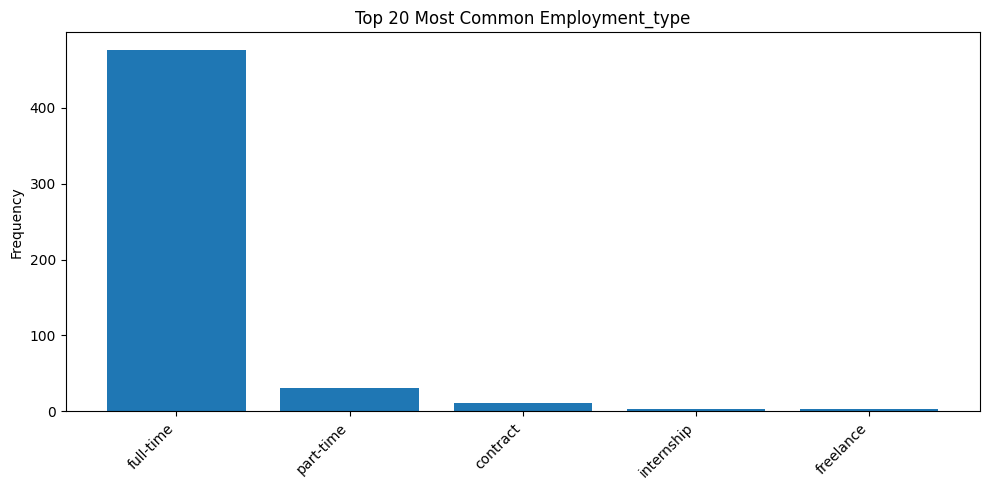

Full list of consolidated employment_type term frequencies:

full-time            476
part-time            30
contract             11
internship           3
freelance            3

Consolidation details:


In [30]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'employment_type', similarity_threshold=0.4, n=2, top_n=20, 
                                     figsize=(10, 5), rotation=45, show_details=True)

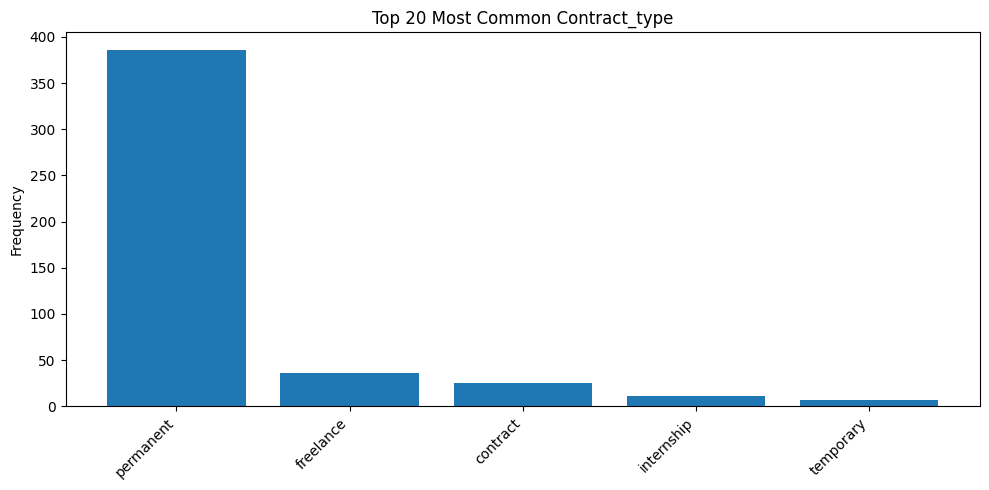

Full list of consolidated contract_type term frequencies:

permanent            386
freelance            36
contract             25
internship           11
temporary            7

Consolidation details:


In [31]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'contract_type', similarity_threshold=0.4, n=2, top_n=20, 
                                     figsize=(10, 5), rotation=45, show_details=True)

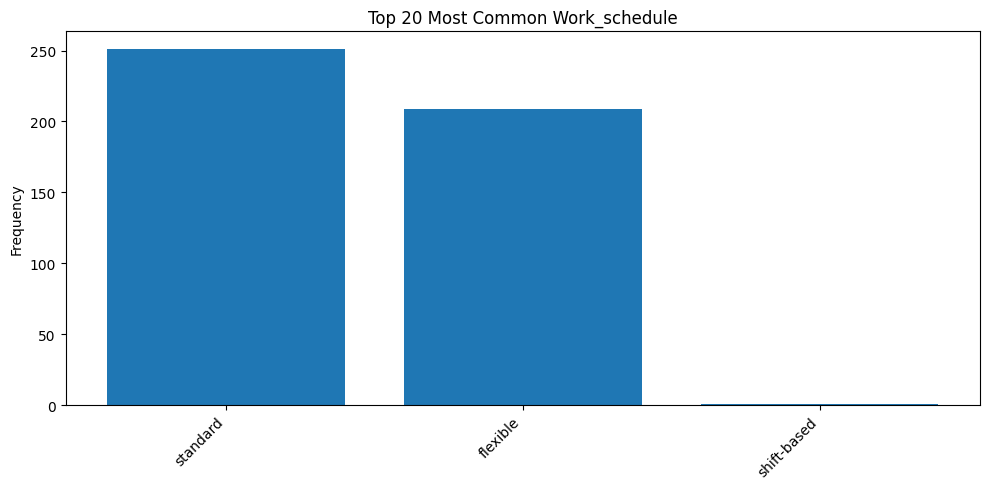

Full list of consolidated work_schedule term frequencies:

standard             251
flexible             209
shift-based          1

Consolidation details:


In [32]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'work_schedule', similarity_threshold=0.4, n=2, top_n=20, 
                                     figsize=(10, 5), rotation=45, show_details=True)

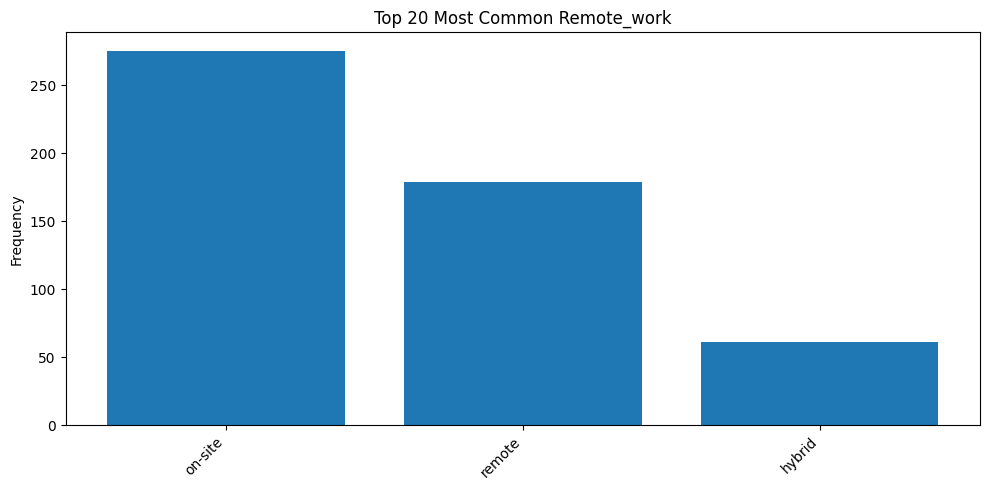

Full list of consolidated remote_work term frequencies:

on-site              275
remote               179
hybrid               61

Consolidation details:


In [33]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'remote_work', similarity_threshold=0.3, n=2, top_n=20, 
                                     figsize=(10, 5), rotation=45, show_details=True)

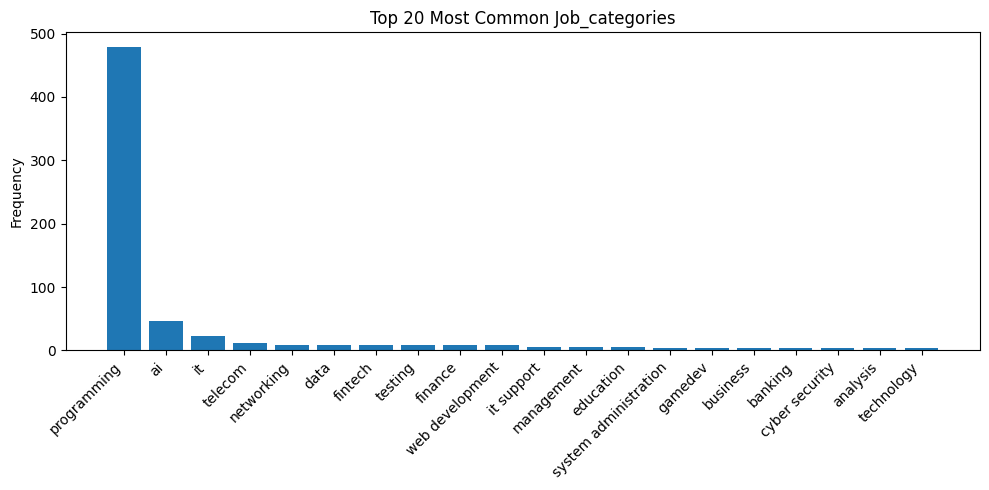

Full list of consolidated job_categories term frequencies:

programming          478
ai                   47
it                   23
telecom              12
networking           9
data                 9
fintech              9
testing              8
finance              8
web development      8
it support           6
management           6
education            5
system administration 4
gamedev              4
business             4
banking              4
cyber security       4
analysis             4
technology           4
cloud                3
engineering          3
sales                3
qa                   2
human resources      2
data analytics       2
hospitality          2
developer relations  2
construction         1
travel               1
accounting           1
supply chain         1
design               1
it services          1
regional planning    1
blockchain           1
market research      1
consulting           1
iot                  1
ecommerce            1

Consolidation

In [34]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'job_categories', similarity_threshold=0.3, n=2, top_n=20, 
                                     figsize=(10, 5), rotation=45, show_details=True)

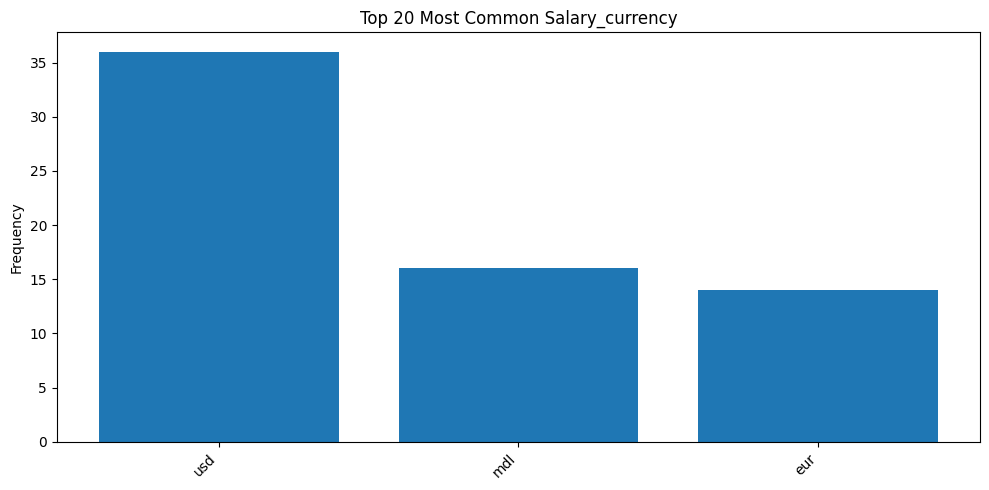

Full list of consolidated salary_currency term frequencies:

usd                  36
mdl                  16
eur                  14

Consolidation details:


In [35]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'salary_currency', similarity_threshold=0.3, n=2, top_n=20, 
                                     figsize=(10, 5), rotation=45, show_details=True)

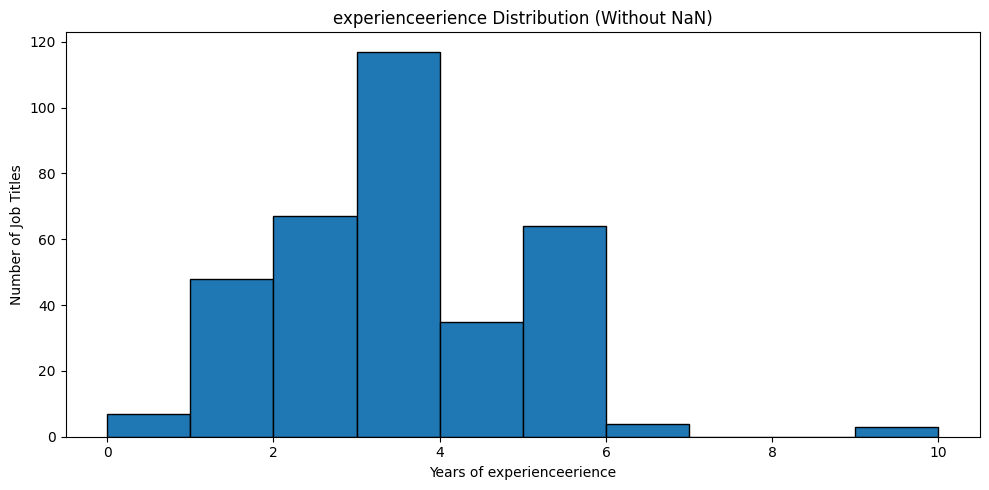

experienceerience Stats (After Dropping NaN):

count    345.000000
mean       3.034783
std        1.520770
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       10.000000
Name: experience, dtype: float64


In [36]:
df['experience'] = pd.to_numeric(df['experience'], errors='coerce')
df_clean = df.dropna(subset=['experience'])

# Plot experienceerience distribution
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(df_clean['experience'], bins=range(int(df_clean['experience'].min()), int(df_clean['experience'].max()) + 1), edgecolor='black')
ax.set_title('experienceerience Distribution (Without NaN)')
ax.set_xlabel('Years of experienceerience')
ax.set_ylabel('Number of Job Titles')
plt.tight_layout()
plt.show()

# Print experienceerience stats for cleaned data
print("experienceerience Stats (After Dropping NaN):\n")
print(df_clean['experience'].describe())


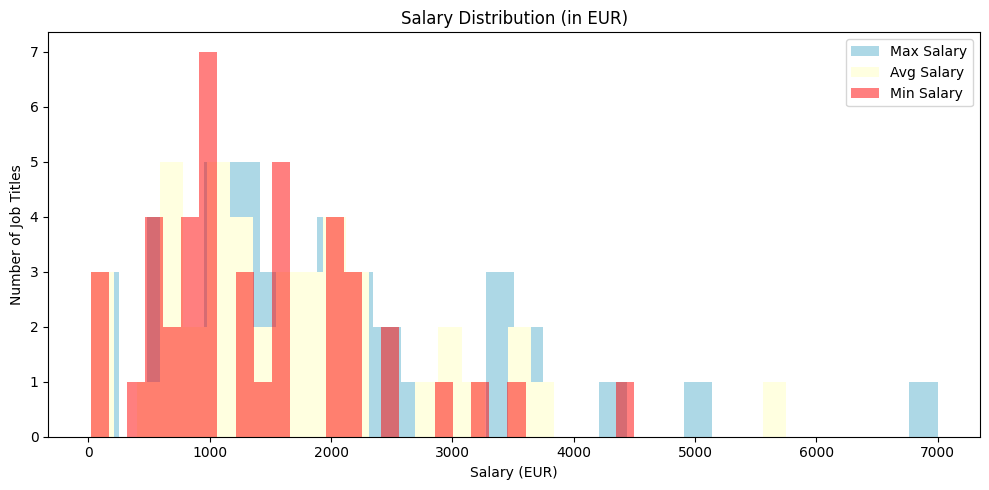

Salary Stats (on 43 salaries)(in EUR, After Conversion):

       salary_min_eur  salary_avg_eur  salary_max_eur
count       43.000000       43.000000       43.000000
mean      1425.879070     1695.304651     1964.730233
std        964.999396     1141.934807     1392.602119
min         17.600000       19.800000       22.000000
25%        765.000000      959.750000     1045.500000
50%       1320.000000     1402.500000     1760.000000
75%       1990.000000     2150.000000     2550.000000
max       4500.000000     5750.000000     7000.000000


In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `df` is already loaded

# Conversion rates to EUR
currency_rates = {
    'usd': 0.88,
    'mdl': 0.051,
    'eur': 1.0,
    'gbp': 1.17  # Add GBP if needed
}

# Function to convert salary to EUR
def convert_to_eur(row):
    currency = (row.get('salary_currency') or '').lower()
    rate = currency_rates.get(currency)
    
    if rate and pd.notnull(row.get('min_salary')):
        min_salary_eur = row['min_salary'] * rate
        max_salary = row.get('max_salary')
        max_salary_eur = max_salary * rate if pd.notnull(max_salary) else None
    else:
        min_salary_eur = max_salary_eur = None
    
    return pd.Series([min_salary_eur, max_salary_eur])

# Apply the conversion
df[['salary_min_eur', 'salary_max_eur']] = df.apply(convert_to_eur, axis=1)

# Drop rows with missing salary values
df_clean_salaries = df.dropna(subset=['salary_min_eur', 'salary_max_eur']).copy()
df_clean_salaries['salary_avg_eur'] = (
    df_clean_salaries['salary_min_eur'] + df_clean_salaries['salary_max_eur']
) / 2

# Plot salary distributions
plt.figure(figsize=(10, 5))
plt.hist(df_clean_salaries['salary_max_eur'], bins=30, alpha=1, label='Max Salary', color='lightblue')
plt.hist(df_clean_salaries['salary_avg_eur'], bins=30, alpha=1, label='Avg Salary', color='lightyellow')
plt.hist(df_clean_salaries['salary_min_eur'], bins=30, alpha=0.5, label='Min Salary', color='red')
plt.title('Salary Distribution (in EUR)')
plt.xlabel('Salary (EUR)')
plt.ylabel('Number of Job Titles')
plt.legend()
plt.tight_layout()
plt.show()

# Print salary stats
print(f"Salary Stats (on {len(df_clean_salaries)} salaries)(in EUR, After Conversion):\n")
print(df_clean_salaries[['salary_min_eur', 'salary_avg_eur', 'salary_max_eur']].describe())


In [38]:
import pandas as pd

# Assuming `df` is already loaded with 'salary_max_eur' and 'title' columns

# Create a new column combining title and maximum salary to identify unique pairs
df['title_salary_pair'] = df['title'].astype(str) + '_' + df['salary_max_eur'].astype(str)

# Drop duplicate rows based on the 'title_salary_pair' column, keeping the first occurrence
df_unique_title_salary = df.drop_duplicates(subset=['title_salary_pair'], keep='first')

# Sort the unique pairs by 'salary_max_eur' in descending order
df_sorted_unique = df_unique_title_salary.sort_values(by='salary_max_eur', ascending=False)

# Display the job titles and their maximum salaries (for the top 20 unique pairs)
print("Unique Job Titles and Maximum Salary Pairs (Highest Salary First):\n")
print(df_sorted_unique[['title', 'salary_max_eur']][:11])

# Optionally, you can drop the temporary 'title_salary_pair' column if you no longer need it
df = df.drop(columns=['title_salary_pair'])

Unique Job Titles and Maximum Salary Pairs (Highest Salary First):

                        title  salary_max_eur
205         backend developer          7000.0
150          python developer          5000.0
170       fullstack developer          4400.0
69   chief technology officer          3520.0
92           nodejs developer          3520.0
185         android developer          3500.0
178             ios developer          3500.0
96              php developer          3500.0
86          flutter developer          3000.0
47           dotnet developer          2600.0
266             php developer          2550.0


In [39]:
# Analysis by job specialty
job_specialties = df_clean_salaries['generic_title'].value_counts()
print("Job Specialties Distribution:")
for specialty, count in job_specialties.items():
    print(f"{specialty}: {count} positions")
print("\n" + "="*80 + "\n")

# Create salary analysis for each specialty with sufficient data (at least 3 positions)
min_positions = 3
specialties_with_data = job_specialties[job_specialties >= min_positions].index

# Calculate stats for each specialty
specialty_stats = {}
for specialty in specialties_with_data:
    specialty_data = df_clean_salaries[df_clean_salaries['generic_title'] == specialty]
    specialty_stats[specialty] = specialty_data[['salary_min_eur', 'salary_avg_eur', 'salary_max_eur']].describe()

# Print detailed stats for each specialty
for specialty in specialties_with_data:
    specialty_data = df_clean_salaries[df_clean_salaries['generic_title'] == specialty]
    count = len(specialty_data)
    
    print(f"{specialty.upper()} Salary Stats (on {count} salaries)(in EUR, After Conversion):\n")
    print(specialty_stats[specialty])
    print("\n" + "-"*60 + "\n")

# Summary table of all specialties
print("SALARY SUMMARY BY JOB SPECIALTY (in EUR):")
print("="*80)

summary_data = []
for specialty in df_clean_salaries['generic_title'].unique():
    specialty_data = df_clean_salaries[df_clean_salaries['generic_title'] == specialty]
    if len(specialty_data) > 0:
        summary_data.append({
            'Specialty': specialty,
            'Count': len(specialty_data),
            'Min Salary (Avg)': round(specialty_data['salary_min_eur'].mean(), 0),
            'Avg Salary (Avg)': round(specialty_data['salary_avg_eur'].mean(), 0),
            'Max Salary (Avg)': round(specialty_data['salary_max_eur'].mean(), 0),
            'Median Avg Salary': round(specialty_data['salary_avg_eur'].median(), 0)
        })

summary_df = pd.DataFrame(summary_data).sort_values('Avg Salary (Avg)', ascending=False)
print(summary_df.to_string(index=False))

Job Specialties Distribution:
backend: 17 positions
mobile developer: 3 positions
full stack: 3 positions
frontend: 2 positions
gamedev: 2 positions
devops: 1 positions
data: 1 positions


BACKEND Salary Stats (on 17 salaries)(in EUR, After Conversion):

       salary_min_eur  salary_avg_eur  salary_max_eur
count       17.000000       17.000000       17.000000
mean      1732.000000     2054.000000     2376.000000
std        955.636699     1257.766311     1639.481435
min        528.000000      616.000000      704.000000
25%       1020.000000     1320.000000     1320.000000
50%       1584.000000     1785.000000     2200.000000
75%       2200.000000     2200.000000     2600.000000
max       4500.000000     5750.000000     7000.000000

------------------------------------------------------------

MOBILE DEVELOPER Salary Stats (on 3 salaries)(in EUR, After Conversion):

       salary_min_eur  salary_avg_eur  salary_max_eur
count        3.000000        3.000000        3.000000
mean      2166

Correlation between Experience and Minimum Salary (EUR):
                experience  salary_min_eur
experience        1.000000        0.434063
salary_min_eur    0.434063        1.000000

Correlation between Experience and Maximum Salary (EUR):
                experience  salary_max_eur
experience        1.000000        0.394904
salary_max_eur    0.394904        1.000000


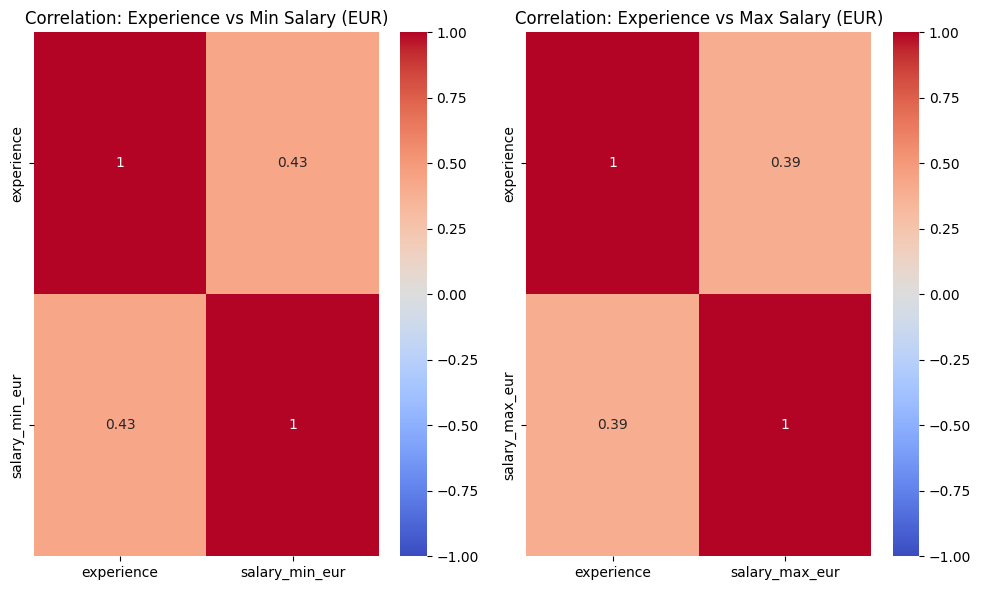

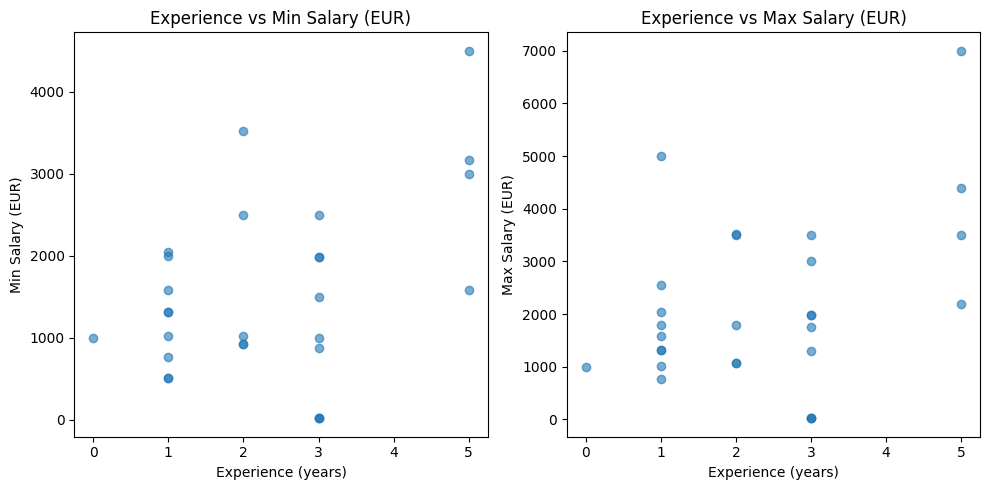

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out rows where experience or salary (min or max) is missing
df_clean_corr = df.dropna(subset=['experience', 'salary_min_eur', 'salary_max_eur'])

# Compute correlation between experience and salaries
correlation_min = df_clean_corr[['experience', 'salary_min_eur']].corr()
correlation_max = df_clean_corr[['experience', 'salary_max_eur']].corr()

# Display correlation matrices
print("Correlation between Experience and Minimum Salary (EUR):")
print(correlation_min)
print("\nCorrelation between Experience and Maximum Salary (EUR):")
print(correlation_max)

# Plot heatmaps of the correlation matrices
plt.figure(figsize=(10, 6))

# Heatmap: Experience vs Min Salary
plt.subplot(1, 2, 1)
sns.heatmap(correlation_min, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation: Experience vs Min Salary (EUR)")

# Heatmap: Experience vs Max Salary
plt.subplot(1, 2, 2)
sns.heatmap(correlation_max, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation: Experience vs Max Salary (EUR)")

plt.tight_layout()
plt.show()

# Scatter plots for visual inspection
plt.figure(figsize=(10, 5))

# Scatter plot: Experience vs Min Salary
plt.subplot(1, 2, 1)
plt.scatter(df_clean_corr['experience'], df_clean_corr['salary_min_eur'], alpha=0.6)
plt.title("Experience vs Min Salary (EUR)")
plt.xlabel('Experience (years)')
plt.ylabel('Min Salary (EUR)')

# Scatter plot: Experience vs Max Salary
plt.subplot(1, 2, 2)
plt.scatter(df_clean_corr['experience'], df_clean_corr['salary_max_eur'], alpha=0.6)
plt.title("Experience vs Max Salary (EUR)")
plt.xlabel('Experience (years)')
plt.ylabel('Max Salary (EUR)')

plt.tight_layout()
plt.show()

Correlation Matrix (Average Salary vs Number of Skills):

                 salary_avg_eur  num_hard_skills  num_soft_skills
salary_avg_eur         1.000000         0.227864         0.333477
num_hard_skills        0.227864         1.000000         0.698077
num_soft_skills        0.333477         0.698077         1.000000


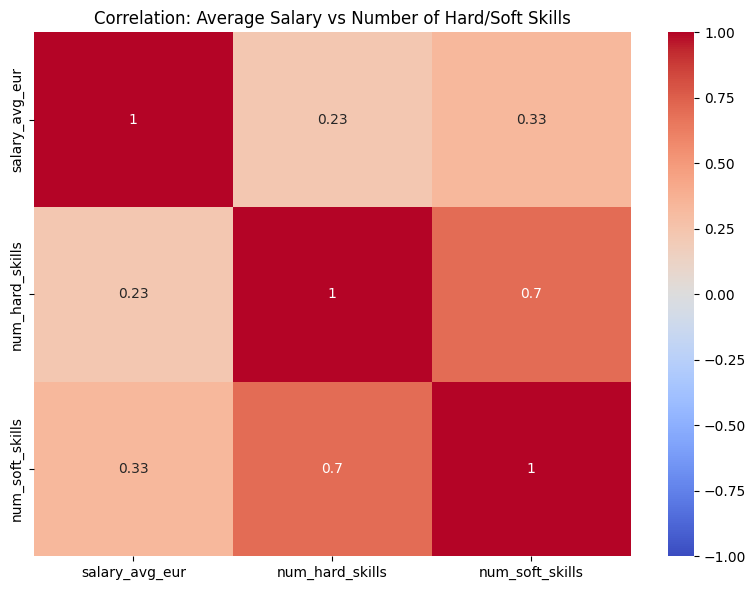

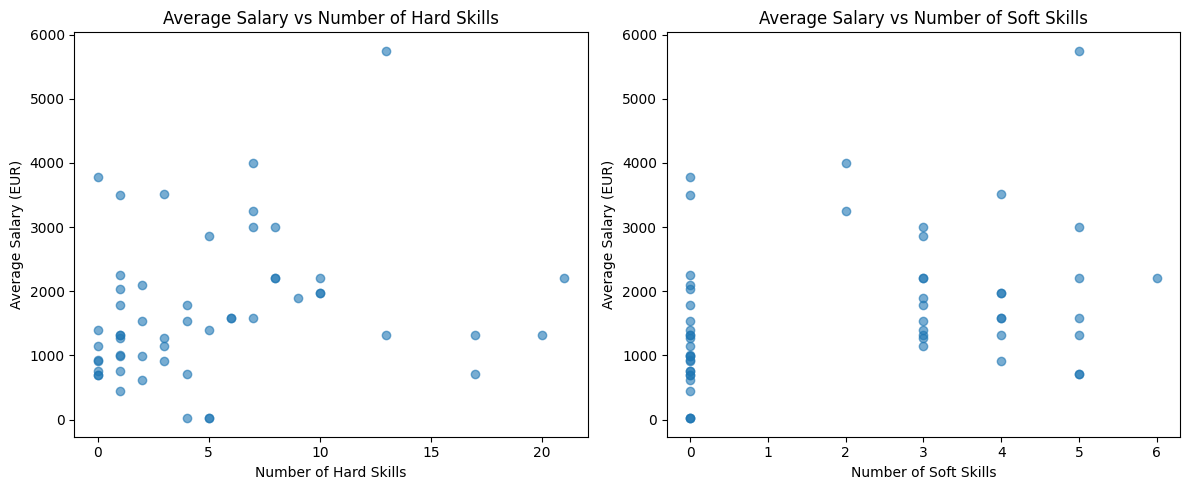

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `df` is already loaded and has `salary_min_eur` and `salary_max_eur` from your previous code

# 1. Calculate average salary (mean of min and max salaries)
df['salary_avg_eur'] = df[['salary_min_eur', 'salary_max_eur']].mean(axis=1)

# 2. Count the number of hard and soft skills
df['num_hard_skills'] = df['hard_skills'].apply(lambda x: len(x) if isinstance(x, list) else 0)
df['num_soft_skills'] = df['soft_skills'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# 3. Filter out rows where salary_avg_eur is NaN
df_clean_skills = df.dropna(subset=['salary_avg_eur'])

# 4. Calculate correlations between average salary and number of skills
correlation_skills = df_clean_skills[['salary_avg_eur', 'num_hard_skills', 'num_soft_skills']].corr()

# Print the correlation matrix
print("Correlation Matrix (Average Salary vs Number of Skills):\n")
print(correlation_skills)

# 5. Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_skills, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation: Average Salary vs Number of Hard/Soft Skills')
plt.tight_layout()
plt.show()

# 6. Plot scatter plots for better visual understanding
plt.figure(figsize=(12, 5))

# Scatter plot for Average Salary vs Number of Hard Skills
plt.subplot(1, 2, 1)
plt.scatter(df_clean_skills['num_hard_skills'], df_clean_skills['salary_avg_eur'], alpha=0.6)
plt.title('Average Salary vs Number of Hard Skills')
plt.xlabel('Number of Hard Skills')
plt.ylabel('Average Salary (EUR)')

# Scatter plot for Average Salary vs Number of Soft Skills
plt.subplot(1, 2, 2)
plt.scatter(df_clean_skills['num_soft_skills'], df_clean_skills['salary_avg_eur'], alpha=0.6)
plt.title('Average Salary vs Number of Soft Skills')
plt.xlabel('Number of Soft Skills')
plt.ylabel('Average Salary (EUR)')

plt.tight_layout()
plt.show()


Correlation Matrix (Experience vs Number of Skills):

                 experience  num_hard_skills  num_soft_skills
experience         1.000000         0.246004         0.246412
num_hard_skills    0.246004         1.000000         0.574166
num_soft_skills    0.246412         0.574166         1.000000


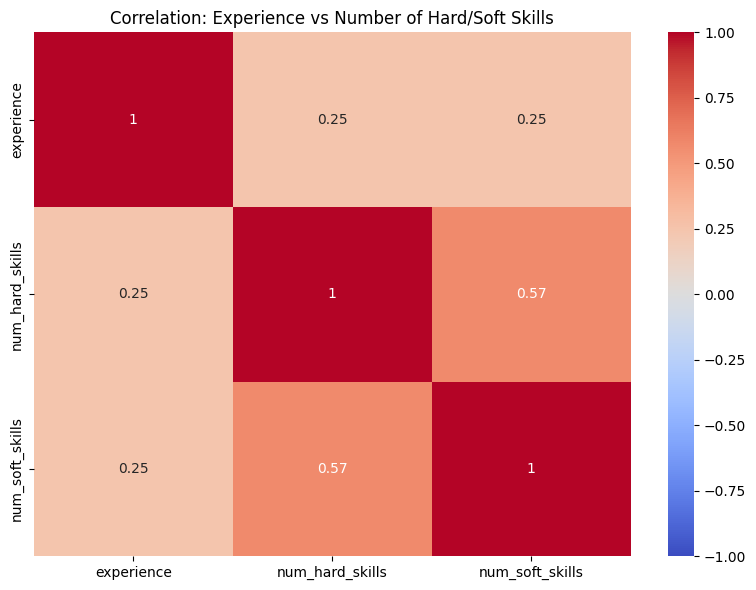

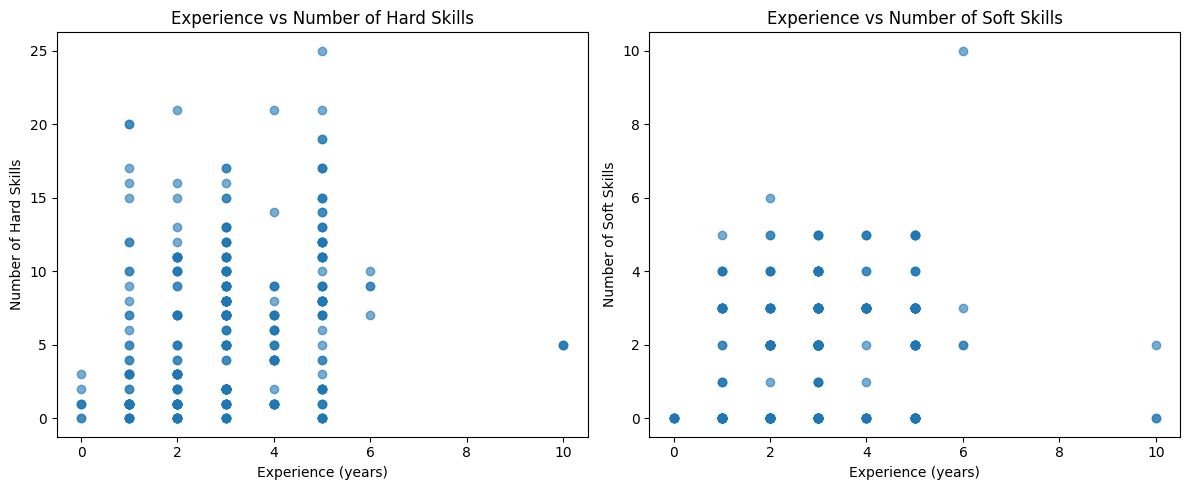

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `df` is already loaded

# Clean rows with NaN in 'experience', 'hard_skills', or 'soft_skills' and create a copy
df_clean_skills_exp = df.dropna(subset=['experience', 'hard_skills', 'soft_skills']).copy()

# Count the number of hard and soft skills
df_clean_skills_exp['num_hard_skills'] = df_clean_skills_exp['hard_skills'].apply(lambda x: len(x) if isinstance(x, list) else 0)
df_clean_skills_exp['num_soft_skills'] = df_clean_skills_exp['soft_skills'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Calculate correlations between experience and number of skills
correlation_exp_skills = df_clean_skills_exp[['experience', 'num_hard_skills', 'num_soft_skills']].corr()

# Print the correlation matrix
print("Correlation Matrix (Experience vs Number of Skills):\n")
print(correlation_exp_skills)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_exp_skills, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation: Experience vs Number of Hard/Soft Skills')
plt.tight_layout()
plt.show()

# Plot scatter plots for better visual understanding
plt.figure(figsize=(12, 5))

# Scatter plot for Experience vs Number of Hard Skills
plt.subplot(1, 2, 1)
plt.scatter(df_clean_skills_exp['experience'], df_clean_skills_exp['num_hard_skills'], alpha=0.6)
plt.title('Experience vs Number of Hard Skills')
plt.xlabel('Experience (years)')
plt.ylabel('Number of Hard Skills')

# Scatter plot for Experience vs Number of Soft Skills
plt.subplot(1, 2, 2)
plt.scatter(df_clean_skills_exp['experience'], df_clean_skills_exp['num_soft_skills'], alpha=0.6)
plt.title('Experience vs Number of Soft Skills')
plt.xlabel('Experience (years)')
plt.ylabel('Number of Soft Skills')

plt.tight_layout()
plt.show()


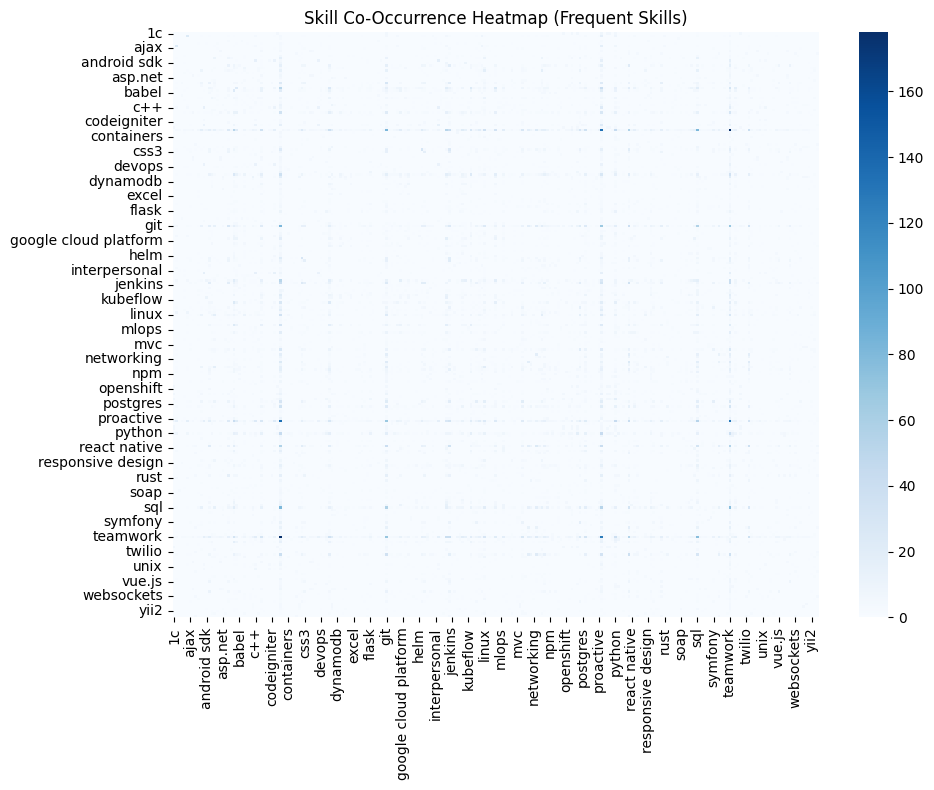

Top Skill Co-Occurrences:
communication & teamwork: 178 jobs
communication & problem solving: 134 jobs
problem solving & teamwork: 126 jobs
communication & git: 82 jobs
communication & sql: 81 jobs
sql & teamwork: 76 jobs
git & teamwork: 70 jobs
git & problem solving: 68 jobs
communication & react: 57 jobs
git & sql: 57 jobs
react & teamwork: 56 jobs
problem solving & sql: 53 jobs
communication & java: 52 jobs
aws & communication: 52 jobs
communication & python: 45 jobs
problem solving & python: 44 jobs
problem solving & react: 42 jobs
aws & problem solving: 42 jobs
communication & javascript: 42 jobs
javascript & teamwork: 41 jobs
communication & typescript: 41 jobs
java & teamwork: 41 jobs
git & react: 40 jobs
python & teamwork: 39 jobs
communication & docker: 38 jobs
react & typescript: 38 jobs
teamwork & typescript: 38 jobs
git & typescript: 36 jobs
communication & linux: 36 jobs
docker & teamwork: 36 jobs
javascript & react: 35 jobs
communication & postgresql: 35 jobs
cicd & commu

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

# Assuming df is already loaded
# Flatten all skills (hard + soft) into a single list per job
df['all_skills'] = df['hard_skills'] + df['soft_skills']

# Step 1: Collect unique skills incrementally and count frequencies
skill_counts = {}
for skills in df['all_skills']:
    for skill in skills:
        skill_counts[skill] = skill_counts.get(skill, 0) + 1

# Step 2: Filter skills appearing in at least 3 jobs
min_appearances = 3
frequent_skills = [skill for skill, count in skill_counts.items() if count >= min_appearances]
frequent_skills.sort()  # Sort for consistent ordering
skill_to_idx = {skill: idx for idx, skill in enumerate(frequent_skills)}

# Step 3: Create co-occurrence matrix using numpy
n_skills = len(frequent_skills)
co_occurrence_np = np.zeros((n_skills, n_skills), dtype=int)
for skills in df['all_skills']:
    # Only consider frequent skills
    job_skills = [skill for skill in skills if skill in skill_to_idx]
    skill_indices = [skill_to_idx[skill] for skill in job_skills]
    for i, j in combinations(skill_indices, 2):
        co_occurrence_np[i, j] += 1
        co_occurrence_np[j, i] += 1

# Convert to DataFrame for plotting
co_occurrence = pd.DataFrame(co_occurrence_np, index=frequent_skills, columns=frequent_skills)

# Step 4: Visualize as a heatmap
plt.figure(figsize=(10, 8))
annot = len(frequent_skills) <= 15
sns.heatmap(co_occurrence, cmap='Blues', annot=annot, fmt='d')
plt.title('Skill Co-Occurrence Heatmap (Frequent Skills)')
plt.tight_layout()
plt.show()

# Step 5: Alternative visualization - Bar chart of top co-occurrences
co_occurrence_stack = co_occurrence.where(np.triu(np.ones(co_occurrence.shape), k=1).astype(bool)).stack()
top_co_occurrences = co_occurrence_stack[co_occurrence_stack > 0].sort_values(ascending=False).head(50)

# Print top co-occurrences
print("Top Skill Co-Occurrences:")
for (skill1, skill2), count in top_co_occurrences.items():
    print(f"{skill1} & {skill2}: {int(count)} jobs")